
# MINIGUIA DE CRIPTOMOEDAS - USANDO COLAB + ANALISE DESCRITIVA E PREDITIVA DE CRIPTOS

In [ ]:
# Instalação de bibliotecas
!pip install pdfplumber --quiet
!pip install pyttsx3
!pip install gTTS
!pip install pycoingecko

In [ ]:
#importação de bibliotecas

import pdfplumber
from IPython.display import display, Markdown
import re
from gtts import gTTS
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pycoingecko import CoinGeckoAPI


In [ ]:
# Instalação de bibliotecas
!pip install pdfplumber --quiet
!pip install pyttsx3
!pip install gTTS
!pip install pycoingecko

In [ ]:
#Conecta o Google Drive ao Colab para acessar seus PDFs.

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Listar PDFs no Drive

pdf_paths = [
    "/content/drive/MyDrive/cursos/08.-Bitcoin-para-programadores-Autor-Marco-Agner.pdf",
    "/content/drive/MyDrive/cursos/Bitcoin-Red-Pill-O-Renascimento-Moral-Material-e-Tecnol-gico-Renato-Amoedo-e-Alan-Schramm.pdf",
    "/content/drive/MyDrive/cursos/O-que-sao-Criptomoedas-.pdf",
    "/content/drive/MyDrive/cursos/ebook-criptomoedas.pdf"
]


In [ ]:
#Mostra na tela os PDFs que serão processado

print("PDFs configurados para miniguia:")
for path in pdf_paths:
    print("-", path.split("/")[-1])

PDFs configurados para miniguia:
- 08.-Bitcoin-para-programadores-Autor-Marco-Agner.pdf
- Bitcoin-Red-Pill-O-Renascimento-Moral-Material-e-Tecnol-gico-Renato-Amoedo-e-Alan-Schramm.pdf
- O-que-sao-Criptomoedas-.pdf
- ebook-criptomoedas.pdf


In [ ]:
#Extração de texto dos PDFs

pdf_textos = {}
for path in pdf_paths:
    texto = ""
    with pdfplumber.open(path) as pdf:
        for page in pdf.pages:
            t = page.extract_text()
            if t:
                texto += t + "\n"
    pdf_textos[path] = texto

    # Exibir texto extraído de cada PDF
    print(f"=== Texto do PDF: {path.split('/')[-1]} ===")
    print(texto[:1000])  # mostra só os primeiros 1000 caracteres para não travar


=== Texto do PDF: 08.-Bitcoin-para-programadores-Autor-Marco-Agner.pdf ===
Tabela de conteúdos
Introduction 1.1
Introdução 1.2
Bitcoin Core 1.3
Endereços e Carteiras 1.4
Transações 1.5
Rede P2P 1.6
Blockchain 1.7
Mineração 1.8
Errata 1.9
2
Introduction
Bitcoin para Programadores
Este livro em formato digital foi escrito por Marco Agner e faz parte de um projeto em
conjunto com ITS Rio. O código-fonte deste livro está em:
https://github.com/lxparallel/bitcoin-para-programadores.
Sobre o Conteúdo
Tornar-se apto a desenvolver aplicações Bitcoin de forma segura e consciente requer o
entendimento de um grupo peculiar de assuntos, incluindo - sem limitar - Network,
Criptografia, Sistemas Distribuídos, etc. E, tão importante quanto assuntos exatos, estão
assuntos humanos para que possamos ter a visão de como sistemas podem criar incentivos
para que atores humanos ajam de uma forma ou de outra, ou como uma aplicação pode se
tornar mais segura utilizando a linguagem correta.
Este material tem o

In [ ]:
from IPython.display import display, Markdown
import pdfplumber

# Lista de PDFs
pdf_paths = [
    "/content/drive/MyDrive/cursos/08.-Bitcoin-para-programadores-Autor-Marco-Agner.pdf",
    "/content/drive/MyDrive/cursos/Bitcoin-Red-Pill-O-Renascimento-Moral-Material-e-Tecnol-gico-Renato-Amoedo-e-Alan-Schramm.pdf",
    "/content/drive/MyDrive/cursos/O-que-sao-Criptomoedas-.pdf",
    "/content/drive/MyDrive/cursos/ebook-criptomoedas.pdf"
]

# Função que gera miniguia de prompts (Resumo, Glossário, Perguntas)
def gerar_miniguia_gemini(texto):
    resumo = f"Resuma este texto de forma didática e objetiva sobre criptomoedas, incluindo blockchain, Bitcoin, altcoins, stablecoins, mineração e segurança:\n\n{texto[:5000]}"
    glossario = ["Blockchain", "Bitcoin", "Altcoins", "Stablecoins", "Mineração"]
    perguntas = [
        "O que é Bitcoin?",
        "Qual a função da blockchain?",
        "O que diferencia altcoins de bitcoin?",
        "Para que servem stablecoins?",
        "Como a mineração garante segurança?"
    ]
    prompts = {
        "Resumo": resumo,
        "Glossário": glossario,
        "Perguntas": perguntas
    }
    return prompts

# Criar dicionário global para armazenar todos os PDFs
miniguia_prompts = {}

# Loop pelos PDFs
for path in pdf_paths:
    # Extrair texto
    texto = ""
    with pdfplumber.open(path) as pdf:
        for page in pdf.pages:
            t = page.extract_text()
            if t:
                texto += t + "\n"

    # Gerar miniguia
    miniguia = gerar_miniguia_gemini(texto)

    # Salvar no dicionário global
    miniguia_prompts[path] = miniguia

    # Exibir resultados organizados
    display(Markdown(f"# PDF: {path.split('/')[-1]}"))

    # Resumo
    display(Markdown("## Resumo"))
    display(Markdown(miniguia["Resumo"]))

    # Glossário
    display(Markdown("## Glossário"))
    for termo in miniguia["Glossário"]:
        display(Markdown(f"- {termo}"))

    # Perguntas
    display(Markdown("## Perguntas"))
    for pergunta in miniguia["Perguntas"]:
        display(Markdown(f"- {pergunta}"))


# PDF: 08.-Bitcoin-para-programadores-Autor-Marco-Agner.pdf

## Resumo

Resuma este texto de forma didática e objetiva sobre criptomoedas, incluindo blockchain, Bitcoin, altcoins, stablecoins, mineração e segurança:

Tabela de conteúdos
Introduction 1.1
Introdução 1.2
Bitcoin Core 1.3
Endereços e Carteiras 1.4
Transações 1.5
Rede P2P 1.6
Blockchain 1.7
Mineração 1.8
Errata 1.9
2
Introduction
Bitcoin para Programadores
Este livro em formato digital foi escrito por Marco Agner e faz parte de um projeto em
conjunto com ITS Rio. O código-fonte deste livro está em:
https://github.com/lxparallel/bitcoin-para-programadores.
Sobre o Conteúdo
Tornar-se apto a desenvolver aplicações Bitcoin de forma segura e consciente requer o
entendimento de um grupo peculiar de assuntos, incluindo - sem limitar - Network,
Criptografia, Sistemas Distribuídos, etc. E, tão importante quanto assuntos exatos, estão
assuntos humanos para que possamos ter a visão de como sistemas podem criar incentivos
para que atores humanos ajam de uma forma ou de outra, ou como uma aplicação pode se
tornar mais segura utilizando a linguagem correta.
Este material tem o objetivo de introduzir programadores com interesse nascente nesta
tecnologia aos conceitos básicos necessários para o entendimento e desenvolvimento de
aplicações Bitcoin. O foco é o mais prático quanto possível sem perder de vista a teoria
necessária para uma prática sólida e independente. Logo, por não ser uma especificacão
técnica detalhada sobre cada minúncia do protocolo, materiais opcionais para
aprofundamento são recomendados ao longo do texto. E, por sua natureza digital, este
material permanecerá em evolução em busca de estender e melhorar seu conteúdo.
A linguagem de programação utilizada nos exemplos de implementação nesta primeira
versão é Python 3 devido à sua sintaxe de fácil compreensão mesmo para programadores
sem experiência na linguagem e a disposição de ótimas bibliotecas para abstração de todo
conhecimento que não é especificamente necessário para o conteúdo apresentado,
fazendo com que o material atinja o objetivo de capacitar o maior número de pessoas com
os mesmos recursos.
Tudo o que você precisa para tirar máximo proveito do material apresentado é ter alguma
experiência na arte da programação de computadores, exposição ao paradigma de
orientação a objetos e interesse por esta tecnologia revolucionária. No entanto, em razão do
caráter introdutório do conteúdo, muitas pessoas sem experiência em programação
poderão tirar bastante proveito do material.
Que este possa ser apenas o início de sua jornada numa tecnologia que realmente importa.
Sumário
3
Introduction
Introdução
Bitcoin Core
Endereços e Carteiras
Transações
Rede P2P
Blockchain
Mineração
Errata
This work is licensed under a Creative Commons Attribution 4.0 International License.
4
Introdução
Introdução
O que é Bitcoin?
De Forma Resumida
Em tradução livre do repositório da principal implementação atualmente (Bitcoin Core):
"Bitcoin é uma nova moeda digital experimental que permite pagamento instantâneo
para qualquer pessoa, em qualquer lugar do mundo. Bitcoin usa tecnologia peer-to-
peer (P2P) para operar sem autoridade central: a gerência de transações e a emissão
de dinheiro é executada coletivamente pela rede. Bitcoin Core é o nome do software
open source que habilita o uso desta moeda."
Indo um Pouco Além...
Bitcoin é a união de tecnologias e abstracões que possibilitam que o consenso entre atores
não necessariamente conhecidos possa ser alcançado de forma descentralizada sem que a
confiaça tenha que ser depositada em um ponto de controle central ou que a segurança
rede esteja sujeita à um único ponto de falha. Estas tecnologias em conjunto formam as
bases para a existência de uma moeda digital descentralizada e para qualquer outro caso
de uso que possamos abstrair para um modelo baseado em consenso - como contratos - de
forma independente de autoridades centrais como bancos ou governos.
E, é importante reparar que o mesmo termo "Bitcoin" com "B" maiúsculo é comumente
utilizado para designar a tecnologia como um todo, a rede P2P Bitcoin ou o protocolo
Bitcoin enquanto bitcoin(s) com "b" minúsculo é utilizado para designar a unidade de conta
usada na rede.
A Criptografia no Bitcoin
Bitcoin é uma cripto-moeda; e isto se deve ao fato de a Criptografia ser uma parte essencial
em seu funcionamento.
A Criptografia é um ramo da matemática que, em sua definição moderna, acolhe toda a
tecnologia criada e utilizada para restringir verdades fundamentais da natureza da
informação com o intuito de alcançar objetivos como: esconder mensagens, provar a
5
Introdução
existência de um segredo sem a necessidade de revelar o segredo, provar autenticidade e
integridade de dados, provar trabalho computacional etc...
A princípio, no Bitcoin, estamos interessados em atingir os seguintes objetivos com uso de
algoritmos criptográficos: Garantia de integridade e consistência de dados na rede e prova
de trabalho computacional utilizando hashes e autenticidade das transações utilizando
assinaturas digitais de Criptografia de Chave Pública.
Funções Hash Criptográficas
Este tipo de função é usado como bloco fundamental em muitas aplicações cripto

## Glossário

- Blockchain

- Bitcoin

- Altcoins

- Stablecoins

- Mineração

## Perguntas

- O que é Bitcoin?

- Qual a função da blockchain?

- O que diferencia altcoins de bitcoin?

- Para que servem stablecoins?

- Como a mineração garante segurança?

# PDF: Bitcoin-Red-Pill-O-Renascimento-Moral-Material-e-Tecnol-gico-Renato-Amoedo-e-Alan-Schramm.pdf

## Resumo

Resuma este texto de forma didática e objetiva sobre criptomoedas, incluindo blockchain, Bitcoin, altcoins, stablecoins, mineração e segurança:

BITCOIN RED PILL
O Renascimento moral, material e tecnológico
2ª edição
2021
RENATO AMOEDO (@renatotrezoitao)
ALAN SCHRAMM (@alan_schramm)
Revisão
Antonio Lucas Ribeiro (@TonyoLucas)
Lázaro Hanyecz (@bitcoinvangeli1)
Mathias (@mattbitcoiner)
Lucas Ribeiro (@LucasRibeiro_RI)
Copyright © 2021 – Renato Amoedo e Alan Schramm
Todos os direitos reservados.
ISBN: 979-8692311566
Agradecimento
Agradecemos a Cátia Regina Raulino, Eliezer de Queiroz Moreira,
José Dirceu, Roger Abdelmassih, Eugenio Chipkevitch, Dilma Rousseff,
João de Deus e Luiz Inácio, por mostrarem qual o comportamento
dominante neste país e qual o nível moral de seus acadêmicos, instituições e
dirigentes.
Sobre os autores
Renato Amoedo Nadier Rodrigues possui graduação em Engenharia de
Produção Civil pela UNEB (2000-2006) - ocupando a 1ª posição no Enade
2006 - e graduação em Direito pela UFBA (2000-2004) - por
aproveitamento extraordinário. Foi aprovado com nota máxima na
Especialização em Direito Empresarial na UFBA (2004-2006) e laureado
com nota máxima (10 com distinção) no Mestrado em Direito Privado e
Econômico da UFBA (2005-2007). Foi Coordenador Adjunto do Curso de
Direito da FBB e Professor desta instituição (2005-2007), da UNYAHNA
(2006); da FTE (2007-2008); lecionou Direito Comercial como tirocinista,
monitor e Professor substituto da UFBA (2008), aprovado em 1º lugar em
seleção pública; e lecionou Direito Mercantil, Financeiro e Econômico
como Professor Assistente na UFT (2008-2010), aprovado em 1º lugar no
concurso público. Cursou o Doutorado em Administração (Finanças
Estratégicas) da UPM - depositando tese sobre governança corporativa;
assim como o EMLE - European Master in Law and Economics na
condição de bolsista da Comissão Europeia pelo "Erasmus Mundus
Scholarship" (1º lugar do mundo na seleção pela categoria A). É Perito
Criminal desde 2007 e bitcoiner desde 2015.
Endereço para acessar este CV Lattes:
http://lattes.cnpq.br/6778421578122820
Alan Schramm de Lima cursou a School of Art, Game and Animation
SAGA (2012-2014); possui graduação em Design de Comunicação Visual e
Digital pela Universidade Salvador UNIFACS (2012-2016); Higher
Education Course em UX Design pelo Politecnico di Milano-Itália (2019);
Empreendedor na área do Design digital; Coautor de relatórios da
INOVAFLIX (Cryptoclub) sobre Bitcoin (2018); Colunista do Portal
Livecoins; Interesses por: Filosofia Libertária, Economia Austríaca, Cultura
Digital, UI/UX Design, tecnologia e inovação.
Endereço para acessar este CV:
https://www.linkedin.com/in/alan-schramm-08878a57/
PATROCINADORES
Agradecemos imensamente aos nossos
patrocinadores
por apoiar este projeto de educação Bitcoin.
Esta edição contou com o patrocínio
das seguintes empresas:
Bitcoin é como a eletricidade primitiva. Bruto, perigoso, parece muito
volátil e difícil de usar. Com o tempo, vai começar a parecer mais seguro,
fácil e normal. Como a eletricidade, ela inspirará e impulsionará novas
indústrias inimagináveis. E um dia vamos nos perguntar como é que
vivemos sem isso?
@ObiWanKenoBit
Quando um cientista distinto e experiente diz que algo é possível, é
quase certeza que tem razão. Quando ele diz que algo é impossível, ele está
muito provavelmente errado.
O único caminho para desvendar os limites do possível é
aventurar-se um pouco além dele, adentrando o impossível.
Qualquer tecnologia suficientemente avançada é
indistinguível da magia.
Leis de Clark
Quanto mais sábia é uma pessoa, mais aborrecimentos ela tem; e, quanto
mais sabe, mais sofre.
Eclesiastes 1:18
Se a miséria dos pobres não é causada pelas leis da natureza, mas por
nossas instituições, grande é nosso pecado.
Charles Darwin
O Bitcoin foi projetado para ser protegido da influência
de líderes carismáticos.
Satoshi Nakamoto
Caveats (advertência): Nem um único conteúdo nesta obra é
recomendação de investimento nem aconselhamento legal, nenhuma
performance passada garante performance futura. Os coautores têm
posições significativas de seu patrimônio nas nuvens. Bitcoin não é
investimento, mas sim um hedge (proteção). Não existe investimento em
ambiente de juro real negativo.
Maximalistas[1] consideram que: shitcoins como doge, shiba, bch e eth
são ataques de engenharia social contra o Bitcoin; que mais de 90% dos
ICOs são scams descarados; e, que se DeFi (finanças descentralizadas) é o
futuro[2], provavelmente não será onchain — e sim em 2ª camada como
RSK[3], Liquid[4] ou Lightning[5].
Altcoins foram úteis como alternativas para aumentar privacidade e
escalabilidade de transações. Porém, não são mais necessárias para isso,
elas podem ser úteis como testnets e como camadas de redundância para
eventual falha na mainnet, mas a maioria das pessoas que tentam enriquecer
ou “aumentar bitcoins” com altcoins acaba perdendo.
Ter valores depositados em corretora é risco de perda total, com falha na
custódia; e, fazer KYC, informando seu nome, e-mail e endereço é risco de
vida, de se tornar alvo de crimes ou perseguições totalitárias.
SUMÁRIO
PREFÁCIO
PRÓLOG

## Glossário

- Blockchain

- Bitcoin

- Altcoins

- Stablecoins

- Mineração

## Perguntas

- O que é Bitcoin?

- Qual a função da blockchain?

- O que diferencia altcoins de bitcoin?

- Para que servem stablecoins?

- Como a mineração garante segurança?

# PDF: O-que-sao-Criptomoedas-.pdf

## Resumo

Resuma este texto de forma didática e objetiva sobre criptomoedas, incluindo blockchain, Bitcoin, altcoins, stablecoins, mineração e segurança:

O que são
Criptomoedas?
de história
Um pouco
Durante a história da humanidade já utilizamos muitas formas de
pagamento.
A primeira foi o escambo, quando trocamos produtos que tínhamos
em maior quantidade, por outro que precisávamos.
Esse sistema de troca nunca mudou, o que foi se transformando foi
o que trocamos pela mercadoria que precisamos. Da troca entre
produtos e serviços, substituímos por algo que demonstrava o valor
do que queríamos. A isso damos o nome de moeda ou dinheiro.
01
O que são
criptomoedas?
As criptomoedas são uma espécie de ativo digital que
podem exercer funções de moeda, ou seja, servem como
meio de troca de valores para a aquisição de um bem ou
serviço, ou mesmo para reserva de valor, além de algumas
outras funções.
Para ficar mais
vamos
fácil,
dividir o termo?
02
Cripto Vem de criptografia, pois codifica e
protege com cálculos matemáticos
um dado ou informação.
Neste caso estamos falando de
Moeda moeda digital, que é protegida pela
criptografia. As criptomoedas são
nativas do digital, ou seja, foram
criadas e circulam na rede.
03
Por serem 100% digitais, as
criptomoedas não reconhecem
fronteiras.
Além disso, são fáceis de armazenar
e de transacionar, sendo altamente
divisíveis.
Em essência, são descentralizadas e
livres de encargos e regulamentações
de empresas ou governos.
Mas alguns países vêm estudando
formas de regular e regulamentar as
criptomoedas.
04
Principais
Bitcoin
(btc)
criptomoedas
As criptomoedas podem ainda assumir
outros papéis no mundo cripto, não
apenas como meio de troca, como por
exemplo: aquisição de bens, serviços e
também reserva de valor, como forma
de investimento.
Ether
(eth)
05
Bitcoin
Bitcoin dá nome tanto à rede quanto
à criptomoeda. É considerada a mais
famosa do mundo.
Foi criada por uma figura enigmática sob
o nome Satoshi Nakamoto.
Para entender mais sobre a principal e
primeira criptomoeda, recomendamos:
O Livro de Satoshi: A coletânea de
Bitcoin
escritos do criador do Bitcoin -
Satoshi Nakamoto (btc)
06
Ether
Criada pelo jovem Vitalik Buterin em
2013, depois do Bitcoin é a plataforma
que mais vem ganhando popularidade
e também com a segunda maior
capitalização.
Vem da rede Ethereum, que também
é conhecida por ser uma das mais
utilizadas para a criação de projetos,
principalmente no território gamer.
Ether
(eth)
07
Quer conhecer
criptomoedas?
outras
O Mercado Bitcoin tem mais de 150
criptoativos para você comprar e
vender de um jeito fácil.
Acesse: mercadobitcoin.com.br
08


## Glossário

- Blockchain

- Bitcoin

- Altcoins

- Stablecoins

- Mineração

## Perguntas

- O que é Bitcoin?

- Qual a função da blockchain?

- O que diferencia altcoins de bitcoin?

- Para que servem stablecoins?

- Como a mineração garante segurança?

# PDF: ebook-criptomoedas.pdf

## Resumo

Resuma este texto de forma didática e objetiva sobre criptomoedas, incluindo blockchain, Bitcoin, altcoins, stablecoins, mineração e segurança:

CRIPTOMOEDAS:
O QUE É, COMO FUNCIONA E COMO
APLICAR AOS PEQUENOS NEGÓCIOS
SUMÁRIO
A HISTÓRIA DO DINHEIRO.......................................................................2
O QUE SÃO CRIPTOMOEDAS EXATAMENTE?..........................................6
O QUE É UMA BLOCKCHAIN....................................................................8
QUAIS TIPOS DE MOEDA EXISTEM?........................................................10
Tokens........................................................................................................11
Bitcoin.........................................................................................................11
Stablecoin.................................................................................................12
Altcoins.....................................................................................................13
EXTRA: NFTs, o que são?.........................................................................15
QUAL É O VALOR DAS CRIPTOMOEDAS E NFTS?....................................17
COMO APLICAR CRIPTOMOEDAS AOS PEQUENOS NEGÓCIOS.............19
Nova forma de pagamento...................................................................20
Criar conexão com os clientes.............................................................21
Blockchain na segurança.....................................................................23
Logística protegida................................................................................24
CONCLUSÃO: VISÃO DE FUTURO..........................................................25
CRIPTOMOEDAS:
CRIPTOMOEDAS:
O QUE É, COMO FUNCIONA E COMO APLICAR AOS PEQUENOS NEGÓCIOS
O QUE É, COMO FUNCIONA E COMO APLICAR AOS PEQUENOS NEGÓCIOS
No final de outubro de 2018, alguns estudiosos da tecnologia interessados
em criptografia receberam um e-mail com um documento enigmático de
autoria desconhecida - apesar de ter um nome logo no início.
Esse documento era um conjunto de explicações complexas sobre uma
rede mundial descentralizada que criaria uma moeda digital de valor
universal, o Bitcoin, por Satoshi Nakamoto, que hoje questiona-se se realmente
existiu.
No início, poucas pessoas davam valor para isso e acreditavam ser um
devaneio. No entanto, 13 anos depois, a criptomoeda está revolucionando o
mercado e criando uma economia completamente digital e que não está
sob nenhuma jurisdição.
O invento criou todo um ecossistema que permite realizar transações
online, mas que especialistas ainda não tem certeza sobre o seu futuro ou
até mesmo se possui algum
1. O que são criptomoedas?
valor real.
Com todas essas dúvidas
2. Como funcionam?
em mente, criamos este
e-book exclusivo que poderá
responder a muitas dessas
3. Como aplicar aos pequenos negócios?
dúvidas.
Boa leitura!
CRIPTOMOEDAS:
CCRRIIPPTTOOMMOOEEDDAASS::
O QUE É, COMO FUNCIONA E COMO APLICAR AOS PEQUENOS NEGÓCIOS
OO QQUUEE ÉÉ,, CCOOMMOO FFUUNNCCIIOONNAA EE CCOOMMOO AAPPLLIICCAARR AAOOSS PPEEQQUUEENNOOSS NNEEGGÓÓCCIIOOSS
1
A HISTÓRIA DO
DINHEIRO
Antes de compreender o que é uma criptomoeda,
precisamos voltar alguns passos. Você já parou para se perguntar
o que é dinheiro? A maioria das pessoas até questiona a sua
importância na sociedade, e a filosofia, assim como a sociologia,
questiona a nossa relação com ele.
O historiador Yuval Noah Harari, em seu best-seller mundial,
Sapiens: Uma breve história da humanidade comenta que
o dinheiro é a única ficção que todo mundo acredita. Pode
parecer ilógico, uma vez que já nascemos vivendo em
sociedade, mas o dinheiro foi inventado.
CCRRIIPPTTOOMMOOEEDDAASS::
CCRRIIPPTTOOMMOOEEDDAASS::
OO QQUUEE ÉÉ,, CCOOMMOO FFUUNNCCIIOONNAA EE CCOOMMOO AAPPLLIICCAARR AAOOSS PPEEQQUUEENNOOSS NNEEGGÓÓCCIIOOSS
OO QQUUEE ÉÉ,, CCOOMMOO FFUUNNCCIIOONNAA EE CCOOMMOO AAPPLLIICCAARR AAOOSS PPEEQQUUEENNOOSS NNEEGGÓÓCCIIOOSS
2
Nos primórdios da humanidade a sociedade se organizava a
base de escambo. Diferentes pessoas trocavam produtos entre si
para sobreviver. No entanto, não era prático. E se a única pessoa
que planta tomate na sua cidade não precisasse das suas
cebolas? Como você conseguiria a fruta?
O primeiro conceito do dinheiro é justamente esse, ser uma
moeda de troca. Se os tomates possuem um valor monetário
e as cebolas também, é possível trocar sem precisar encontrar
alguém que precisa exatamente do que você oferece, pois, todos
precisam de dinheiro.
Mas nem sempre as moedas e as cédulas foram a prática.
O sal já foi usado na Europa com essa finalidade, assim como
o cacau nas Américas e o arroz na Ásia. No entanto, pense no
seguinte.
Se o arroz era dinheiro e todo mundo precisava, as pessoas
evitariam comê-lo e se dedicariam a plantá-lo, gerando um total
desequilíbrio na economia. Logo, notou-se que era necessário
mais uma premissa. O dinheiro precisava ser uma reserva de
valor. Ou seja, o seu valor não pode variar bruscamente com o
tempo.
Por fim, seguindo essa mesma linha, o sal naquela época
não era padronizado pela indústria. Logo, o sal-rosa-do-himalai

## Glossário

- Blockchain

- Bitcoin

- Altcoins

- Stablecoins

- Mineração

## Perguntas

- O que é Bitcoin?

- Qual a função da blockchain?

- O que diferencia altcoins de bitcoin?

- Para que servem stablecoins?

- Como a mineração garante segurança?

In [ ]:
#Gerar miniguia para todos os PDFs

miniguia_prompts = {}  # dicionário global

for path in pdf_paths:
    texto = ""
    with pdfplumber.open(path) as pdf:
        for page in pdf.pages:
            t = page.extract_text()
            if t:
                texto += t + "\n"
    miniguia = gerar_miniguia_gemini(texto)

    # Salvar no dicionário
    miniguia_prompts[path] = miniguia

    # Exibir resultados organizados (opcional)
    display(Markdown(f"# PDF: {path.split('/')[-1]}"))
    display(Markdown("## Resumo"))
    display(Markdown(miniguia["Resumo"]))


# PDF: 08.-Bitcoin-para-programadores-Autor-Marco-Agner.pdf

## Resumo

Resuma este texto de forma didática e objetiva sobre criptomoedas, incluindo blockchain, Bitcoin, altcoins, stablecoins, mineração e segurança:

Tabela de conteúdos
Introduction 1.1
Introdução 1.2
Bitcoin Core 1.3
Endereços e Carteiras 1.4
Transações 1.5
Rede P2P 1.6
Blockchain 1.7
Mineração 1.8
Errata 1.9
2
Introduction
Bitcoin para Programadores
Este livro em formato digital foi escrito por Marco Agner e faz parte de um projeto em
conjunto com ITS Rio. O código-fonte deste livro está em:
https://github.com/lxparallel/bitcoin-para-programadores.
Sobre o Conteúdo
Tornar-se apto a desenvolver aplicações Bitcoin de forma segura e consciente requer o
entendimento de um grupo peculiar de assuntos, incluindo - sem limitar - Network,
Criptografia, Sistemas Distribuídos, etc. E, tão importante quanto assuntos exatos, estão
assuntos humanos para que possamos ter a visão de como sistemas podem criar incentivos
para que atores humanos ajam de uma forma ou de outra, ou como uma aplicação pode se
tornar mais segura utilizando a linguagem correta.
Este material tem o objetivo de introduzir programadores com interesse nascente nesta
tecnologia aos conceitos básicos necessários para o entendimento e desenvolvimento de
aplicações Bitcoin. O foco é o mais prático quanto possível sem perder de vista a teoria
necessária para uma prática sólida e independente. Logo, por não ser uma especificacão
técnica detalhada sobre cada minúncia do protocolo, materiais opcionais para
aprofundamento são recomendados ao longo do texto. E, por sua natureza digital, este
material permanecerá em evolução em busca de estender e melhorar seu conteúdo.
A linguagem de programação utilizada nos exemplos de implementação nesta primeira
versão é Python 3 devido à sua sintaxe de fácil compreensão mesmo para programadores
sem experiência na linguagem e a disposição de ótimas bibliotecas para abstração de todo
conhecimento que não é especificamente necessário para o conteúdo apresentado,
fazendo com que o material atinja o objetivo de capacitar o maior número de pessoas com
os mesmos recursos.
Tudo o que você precisa para tirar máximo proveito do material apresentado é ter alguma
experiência na arte da programação de computadores, exposição ao paradigma de
orientação a objetos e interesse por esta tecnologia revolucionária. No entanto, em razão do
caráter introdutório do conteúdo, muitas pessoas sem experiência em programação
poderão tirar bastante proveito do material.
Que este possa ser apenas o início de sua jornada numa tecnologia que realmente importa.
Sumário
3
Introduction
Introdução
Bitcoin Core
Endereços e Carteiras
Transações
Rede P2P
Blockchain
Mineração
Errata
This work is licensed under a Creative Commons Attribution 4.0 International License.
4
Introdução
Introdução
O que é Bitcoin?
De Forma Resumida
Em tradução livre do repositório da principal implementação atualmente (Bitcoin Core):
"Bitcoin é uma nova moeda digital experimental que permite pagamento instantâneo
para qualquer pessoa, em qualquer lugar do mundo. Bitcoin usa tecnologia peer-to-
peer (P2P) para operar sem autoridade central: a gerência de transações e a emissão
de dinheiro é executada coletivamente pela rede. Bitcoin Core é o nome do software
open source que habilita o uso desta moeda."
Indo um Pouco Além...
Bitcoin é a união de tecnologias e abstracões que possibilitam que o consenso entre atores
não necessariamente conhecidos possa ser alcançado de forma descentralizada sem que a
confiaça tenha que ser depositada em um ponto de controle central ou que a segurança
rede esteja sujeita à um único ponto de falha. Estas tecnologias em conjunto formam as
bases para a existência de uma moeda digital descentralizada e para qualquer outro caso
de uso que possamos abstrair para um modelo baseado em consenso - como contratos - de
forma independente de autoridades centrais como bancos ou governos.
E, é importante reparar que o mesmo termo "Bitcoin" com "B" maiúsculo é comumente
utilizado para designar a tecnologia como um todo, a rede P2P Bitcoin ou o protocolo
Bitcoin enquanto bitcoin(s) com "b" minúsculo é utilizado para designar a unidade de conta
usada na rede.
A Criptografia no Bitcoin
Bitcoin é uma cripto-moeda; e isto se deve ao fato de a Criptografia ser uma parte essencial
em seu funcionamento.
A Criptografia é um ramo da matemática que, em sua definição moderna, acolhe toda a
tecnologia criada e utilizada para restringir verdades fundamentais da natureza da
informação com o intuito de alcançar objetivos como: esconder mensagens, provar a
5
Introdução
existência de um segredo sem a necessidade de revelar o segredo, provar autenticidade e
integridade de dados, provar trabalho computacional etc...
A princípio, no Bitcoin, estamos interessados em atingir os seguintes objetivos com uso de
algoritmos criptográficos: Garantia de integridade e consistência de dados na rede e prova
de trabalho computacional utilizando hashes e autenticidade das transações utilizando
assinaturas digitais de Criptografia de Chave Pública.
Funções Hash Criptográficas
Este tipo de função é usado como bloco fundamental em muitas aplicações cripto

# PDF: Bitcoin-Red-Pill-O-Renascimento-Moral-Material-e-Tecnol-gico-Renato-Amoedo-e-Alan-Schramm.pdf

## Resumo

Resuma este texto de forma didática e objetiva sobre criptomoedas, incluindo blockchain, Bitcoin, altcoins, stablecoins, mineração e segurança:

BITCOIN RED PILL
O Renascimento moral, material e tecnológico
2ª edição
2021
RENATO AMOEDO (@renatotrezoitao)
ALAN SCHRAMM (@alan_schramm)
Revisão
Antonio Lucas Ribeiro (@TonyoLucas)
Lázaro Hanyecz (@bitcoinvangeli1)
Mathias (@mattbitcoiner)
Lucas Ribeiro (@LucasRibeiro_RI)
Copyright © 2021 – Renato Amoedo e Alan Schramm
Todos os direitos reservados.
ISBN: 979-8692311566
Agradecimento
Agradecemos a Cátia Regina Raulino, Eliezer de Queiroz Moreira,
José Dirceu, Roger Abdelmassih, Eugenio Chipkevitch, Dilma Rousseff,
João de Deus e Luiz Inácio, por mostrarem qual o comportamento
dominante neste país e qual o nível moral de seus acadêmicos, instituições e
dirigentes.
Sobre os autores
Renato Amoedo Nadier Rodrigues possui graduação em Engenharia de
Produção Civil pela UNEB (2000-2006) - ocupando a 1ª posição no Enade
2006 - e graduação em Direito pela UFBA (2000-2004) - por
aproveitamento extraordinário. Foi aprovado com nota máxima na
Especialização em Direito Empresarial na UFBA (2004-2006) e laureado
com nota máxima (10 com distinção) no Mestrado em Direito Privado e
Econômico da UFBA (2005-2007). Foi Coordenador Adjunto do Curso de
Direito da FBB e Professor desta instituição (2005-2007), da UNYAHNA
(2006); da FTE (2007-2008); lecionou Direito Comercial como tirocinista,
monitor e Professor substituto da UFBA (2008), aprovado em 1º lugar em
seleção pública; e lecionou Direito Mercantil, Financeiro e Econômico
como Professor Assistente na UFT (2008-2010), aprovado em 1º lugar no
concurso público. Cursou o Doutorado em Administração (Finanças
Estratégicas) da UPM - depositando tese sobre governança corporativa;
assim como o EMLE - European Master in Law and Economics na
condição de bolsista da Comissão Europeia pelo "Erasmus Mundus
Scholarship" (1º lugar do mundo na seleção pela categoria A). É Perito
Criminal desde 2007 e bitcoiner desde 2015.
Endereço para acessar este CV Lattes:
http://lattes.cnpq.br/6778421578122820
Alan Schramm de Lima cursou a School of Art, Game and Animation
SAGA (2012-2014); possui graduação em Design de Comunicação Visual e
Digital pela Universidade Salvador UNIFACS (2012-2016); Higher
Education Course em UX Design pelo Politecnico di Milano-Itália (2019);
Empreendedor na área do Design digital; Coautor de relatórios da
INOVAFLIX (Cryptoclub) sobre Bitcoin (2018); Colunista do Portal
Livecoins; Interesses por: Filosofia Libertária, Economia Austríaca, Cultura
Digital, UI/UX Design, tecnologia e inovação.
Endereço para acessar este CV:
https://www.linkedin.com/in/alan-schramm-08878a57/
PATROCINADORES
Agradecemos imensamente aos nossos
patrocinadores
por apoiar este projeto de educação Bitcoin.
Esta edição contou com o patrocínio
das seguintes empresas:
Bitcoin é como a eletricidade primitiva. Bruto, perigoso, parece muito
volátil e difícil de usar. Com o tempo, vai começar a parecer mais seguro,
fácil e normal. Como a eletricidade, ela inspirará e impulsionará novas
indústrias inimagináveis. E um dia vamos nos perguntar como é que
vivemos sem isso?
@ObiWanKenoBit
Quando um cientista distinto e experiente diz que algo é possível, é
quase certeza que tem razão. Quando ele diz que algo é impossível, ele está
muito provavelmente errado.
O único caminho para desvendar os limites do possível é
aventurar-se um pouco além dele, adentrando o impossível.
Qualquer tecnologia suficientemente avançada é
indistinguível da magia.
Leis de Clark
Quanto mais sábia é uma pessoa, mais aborrecimentos ela tem; e, quanto
mais sabe, mais sofre.
Eclesiastes 1:18
Se a miséria dos pobres não é causada pelas leis da natureza, mas por
nossas instituições, grande é nosso pecado.
Charles Darwin
O Bitcoin foi projetado para ser protegido da influência
de líderes carismáticos.
Satoshi Nakamoto
Caveats (advertência): Nem um único conteúdo nesta obra é
recomendação de investimento nem aconselhamento legal, nenhuma
performance passada garante performance futura. Os coautores têm
posições significativas de seu patrimônio nas nuvens. Bitcoin não é
investimento, mas sim um hedge (proteção). Não existe investimento em
ambiente de juro real negativo.
Maximalistas[1] consideram que: shitcoins como doge, shiba, bch e eth
são ataques de engenharia social contra o Bitcoin; que mais de 90% dos
ICOs são scams descarados; e, que se DeFi (finanças descentralizadas) é o
futuro[2], provavelmente não será onchain — e sim em 2ª camada como
RSK[3], Liquid[4] ou Lightning[5].
Altcoins foram úteis como alternativas para aumentar privacidade e
escalabilidade de transações. Porém, não são mais necessárias para isso,
elas podem ser úteis como testnets e como camadas de redundância para
eventual falha na mainnet, mas a maioria das pessoas que tentam enriquecer
ou “aumentar bitcoins” com altcoins acaba perdendo.
Ter valores depositados em corretora é risco de perda total, com falha na
custódia; e, fazer KYC, informando seu nome, e-mail e endereço é risco de
vida, de se tornar alvo de crimes ou perseguições totalitárias.
SUMÁRIO
PREFÁCIO
PRÓLOG

# PDF: O-que-sao-Criptomoedas-.pdf

## Resumo

Resuma este texto de forma didática e objetiva sobre criptomoedas, incluindo blockchain, Bitcoin, altcoins, stablecoins, mineração e segurança:

O que são
Criptomoedas?
de história
Um pouco
Durante a história da humanidade já utilizamos muitas formas de
pagamento.
A primeira foi o escambo, quando trocamos produtos que tínhamos
em maior quantidade, por outro que precisávamos.
Esse sistema de troca nunca mudou, o que foi se transformando foi
o que trocamos pela mercadoria que precisamos. Da troca entre
produtos e serviços, substituímos por algo que demonstrava o valor
do que queríamos. A isso damos o nome de moeda ou dinheiro.
01
O que são
criptomoedas?
As criptomoedas são uma espécie de ativo digital que
podem exercer funções de moeda, ou seja, servem como
meio de troca de valores para a aquisição de um bem ou
serviço, ou mesmo para reserva de valor, além de algumas
outras funções.
Para ficar mais
vamos
fácil,
dividir o termo?
02
Cripto Vem de criptografia, pois codifica e
protege com cálculos matemáticos
um dado ou informação.
Neste caso estamos falando de
Moeda moeda digital, que é protegida pela
criptografia. As criptomoedas são
nativas do digital, ou seja, foram
criadas e circulam na rede.
03
Por serem 100% digitais, as
criptomoedas não reconhecem
fronteiras.
Além disso, são fáceis de armazenar
e de transacionar, sendo altamente
divisíveis.
Em essência, são descentralizadas e
livres de encargos e regulamentações
de empresas ou governos.
Mas alguns países vêm estudando
formas de regular e regulamentar as
criptomoedas.
04
Principais
Bitcoin
(btc)
criptomoedas
As criptomoedas podem ainda assumir
outros papéis no mundo cripto, não
apenas como meio de troca, como por
exemplo: aquisição de bens, serviços e
também reserva de valor, como forma
de investimento.
Ether
(eth)
05
Bitcoin
Bitcoin dá nome tanto à rede quanto
à criptomoeda. É considerada a mais
famosa do mundo.
Foi criada por uma figura enigmática sob
o nome Satoshi Nakamoto.
Para entender mais sobre a principal e
primeira criptomoeda, recomendamos:
O Livro de Satoshi: A coletânea de
Bitcoin
escritos do criador do Bitcoin -
Satoshi Nakamoto (btc)
06
Ether
Criada pelo jovem Vitalik Buterin em
2013, depois do Bitcoin é a plataforma
que mais vem ganhando popularidade
e também com a segunda maior
capitalização.
Vem da rede Ethereum, que também
é conhecida por ser uma das mais
utilizadas para a criação de projetos,
principalmente no território gamer.
Ether
(eth)
07
Quer conhecer
criptomoedas?
outras
O Mercado Bitcoin tem mais de 150
criptoativos para você comprar e
vender de um jeito fácil.
Acesse: mercadobitcoin.com.br
08


# PDF: ebook-criptomoedas.pdf

## Resumo

Resuma este texto de forma didática e objetiva sobre criptomoedas, incluindo blockchain, Bitcoin, altcoins, stablecoins, mineração e segurança:

CRIPTOMOEDAS:
O QUE É, COMO FUNCIONA E COMO
APLICAR AOS PEQUENOS NEGÓCIOS
SUMÁRIO
A HISTÓRIA DO DINHEIRO.......................................................................2
O QUE SÃO CRIPTOMOEDAS EXATAMENTE?..........................................6
O QUE É UMA BLOCKCHAIN....................................................................8
QUAIS TIPOS DE MOEDA EXISTEM?........................................................10
Tokens........................................................................................................11
Bitcoin.........................................................................................................11
Stablecoin.................................................................................................12
Altcoins.....................................................................................................13
EXTRA: NFTs, o que são?.........................................................................15
QUAL É O VALOR DAS CRIPTOMOEDAS E NFTS?....................................17
COMO APLICAR CRIPTOMOEDAS AOS PEQUENOS NEGÓCIOS.............19
Nova forma de pagamento...................................................................20
Criar conexão com os clientes.............................................................21
Blockchain na segurança.....................................................................23
Logística protegida................................................................................24
CONCLUSÃO: VISÃO DE FUTURO..........................................................25
CRIPTOMOEDAS:
CRIPTOMOEDAS:
O QUE É, COMO FUNCIONA E COMO APLICAR AOS PEQUENOS NEGÓCIOS
O QUE É, COMO FUNCIONA E COMO APLICAR AOS PEQUENOS NEGÓCIOS
No final de outubro de 2018, alguns estudiosos da tecnologia interessados
em criptografia receberam um e-mail com um documento enigmático de
autoria desconhecida - apesar de ter um nome logo no início.
Esse documento era um conjunto de explicações complexas sobre uma
rede mundial descentralizada que criaria uma moeda digital de valor
universal, o Bitcoin, por Satoshi Nakamoto, que hoje questiona-se se realmente
existiu.
No início, poucas pessoas davam valor para isso e acreditavam ser um
devaneio. No entanto, 13 anos depois, a criptomoeda está revolucionando o
mercado e criando uma economia completamente digital e que não está
sob nenhuma jurisdição.
O invento criou todo um ecossistema que permite realizar transações
online, mas que especialistas ainda não tem certeza sobre o seu futuro ou
até mesmo se possui algum
1. O que são criptomoedas?
valor real.
Com todas essas dúvidas
2. Como funcionam?
em mente, criamos este
e-book exclusivo que poderá
responder a muitas dessas
3. Como aplicar aos pequenos negócios?
dúvidas.
Boa leitura!
CRIPTOMOEDAS:
CCRRIIPPTTOOMMOOEEDDAASS::
O QUE É, COMO FUNCIONA E COMO APLICAR AOS PEQUENOS NEGÓCIOS
OO QQUUEE ÉÉ,, CCOOMMOO FFUUNNCCIIOONNAA EE CCOOMMOO AAPPLLIICCAARR AAOOSS PPEEQQUUEENNOOSS NNEEGGÓÓCCIIOOSS
1
A HISTÓRIA DO
DINHEIRO
Antes de compreender o que é uma criptomoeda,
precisamos voltar alguns passos. Você já parou para se perguntar
o que é dinheiro? A maioria das pessoas até questiona a sua
importância na sociedade, e a filosofia, assim como a sociologia,
questiona a nossa relação com ele.
O historiador Yuval Noah Harari, em seu best-seller mundial,
Sapiens: Uma breve história da humanidade comenta que
o dinheiro é a única ficção que todo mundo acredita. Pode
parecer ilógico, uma vez que já nascemos vivendo em
sociedade, mas o dinheiro foi inventado.
CCRRIIPPTTOOMMOOEEDDAASS::
CCRRIIPPTTOOMMOOEEDDAASS::
OO QQUUEE ÉÉ,, CCOOMMOO FFUUNNCCIIOONNAA EE CCOOMMOO AAPPLLIICCAARR AAOOSS PPEEQQUUEENNOOSS NNEEGGÓÓCCIIOOSS
OO QQUUEE ÉÉ,, CCOOMMOO FFUUNNCCIIOONNAA EE CCOOMMOO AAPPLLIICCAARR AAOOSS PPEEQQUUEENNOOSS NNEEGGÓÓCCIIOOSS
2
Nos primórdios da humanidade a sociedade se organizava a
base de escambo. Diferentes pessoas trocavam produtos entre si
para sobreviver. No entanto, não era prático. E se a única pessoa
que planta tomate na sua cidade não precisasse das suas
cebolas? Como você conseguiria a fruta?
O primeiro conceito do dinheiro é justamente esse, ser uma
moeda de troca. Se os tomates possuem um valor monetário
e as cebolas também, é possível trocar sem precisar encontrar
alguém que precisa exatamente do que você oferece, pois, todos
precisam de dinheiro.
Mas nem sempre as moedas e as cédulas foram a prática.
O sal já foi usado na Europa com essa finalidade, assim como
o cacau nas Américas e o arroz na Ásia. No entanto, pense no
seguinte.
Se o arroz era dinheiro e todo mundo precisava, as pessoas
evitariam comê-lo e se dedicariam a plantá-lo, gerando um total
desequilíbrio na economia. Logo, notou-se que era necessário
mais uma premissa. O dinheiro precisava ser uma reserva de
valor. Ou seja, o seu valor não pode variar bruscamente com o
tempo.
Por fim, seguindo essa mesma linha, o sal naquela época
não era padronizado pela indústria. Logo, o sal-rosa-do-himalai

In [ ]:
# Função para gerar prompts de slides a partir de resumos
def gerar_slides_dos_resumos(miniguia_prompts, max_sentencas=5):
    """
    miniguia_prompts: dict
        Estrutura {pdf_path: {"Resumo": str, "Glossário": list, "Perguntas": list}}
        Aqui vamos usar apenas "Resumo".
    max_sentencas: int
        Número máximo de sentenças do resumo para cada slide
    """
    def resumir_texto(texto, max_sent=max_sentencas):
        sentencas = re.split(r'(?<=[.!?])\s+', texto.strip())
        return ' '.join(sentencas[:max_sent])

    for pdf, conteudos in miniguia_prompts.items():
        display(Markdown(f"# PDF: {pdf.split('/')[-1]}"))

        # Usar apenas o resumo
        if "Resumo" in conteudos:
            resumo_curto = resumir_texto(conteudos["Resumo"])
            prompt = f"""
Crie um slide de apresentação:
Título do slide: Resumo
Conteúdo: {resumo_curto}
Formato: slide limpo, bullets curtos, visual atraente, fácil leitura
"""
            display(Markdown(f"## Prompt Slide Resumo:\n```\n{prompt}\n```"))

# ======================================
# Exemplo de uso com a saída anterior
# ======================================
# Supondo que você tenha uma variável miniguia_prompts de cada PDF
# gerada pela célula anterior:

# miniguia_prompts = {pdf_path: gerar_miniguia_gemini(texto_extraido)}

gerar_slides_dos_resumos(miniguia_prompts)


# PDF: 08.-Bitcoin-para-programadores-Autor-Marco-Agner.pdf

## Prompt Slide Resumo:
```

Crie um slide de apresentação:
Título do slide: Resumo
Conteúdo: Resuma este texto de forma didática e objetiva sobre criptomoedas, incluindo blockchain, Bitcoin, altcoins, stablecoins, mineração e segurança:

Tabela de conteúdos
Introduction 1.1
Introdução 1.2
Bitcoin Core 1.3
Endereços e Carteiras 1.4
Transações 1.5
Rede P2P 1.6
Blockchain 1.7
Mineração 1.8
Errata 1.9
2
Introduction
Bitcoin para Programadores
Este livro em formato digital foi escrito por Marco Agner e faz parte de um projeto em
conjunto com ITS Rio. O código-fonte deste livro está em:
https://github.com/lxparallel/bitcoin-para-programadores. Sobre o Conteúdo
Tornar-se apto a desenvolver aplicações Bitcoin de forma segura e consciente requer o
entendimento de um grupo peculiar de assuntos, incluindo - sem limitar - Network,
Criptografia, Sistemas Distribuídos, etc. E, tão importante quanto assuntos exatos, estão
assuntos humanos para que possamos ter a visão de como sistemas podem criar incentivos
para que atores humanos ajam de uma forma ou de outra, ou como uma aplicação pode se
tornar mais segura utilizando a linguagem correta. Este material tem o objetivo de introduzir programadores com interesse nascente nesta
tecnologia aos conceitos básicos necessários para o entendimento e desenvolvimento de
aplicações Bitcoin.
Formato: slide limpo, bullets curtos, visual atraente, fácil leitura

```

# PDF: Bitcoin-Red-Pill-O-Renascimento-Moral-Material-e-Tecnol-gico-Renato-Amoedo-e-Alan-Schramm.pdf

## Prompt Slide Resumo:
```

Crie um slide de apresentação:
Título do slide: Resumo
Conteúdo: Resuma este texto de forma didática e objetiva sobre criptomoedas, incluindo blockchain, Bitcoin, altcoins, stablecoins, mineração e segurança:

BITCOIN RED PILL
O Renascimento moral, material e tecnológico
2ª edição
2021
RENATO AMOEDO (@renatotrezoitao)
ALAN SCHRAMM (@alan_schramm)
Revisão
Antonio Lucas Ribeiro (@TonyoLucas)
Lázaro Hanyecz (@bitcoinvangeli1)
Mathias (@mattbitcoiner)
Lucas Ribeiro (@LucasRibeiro_RI)
Copyright © 2021 – Renato Amoedo e Alan Schramm
Todos os direitos reservados. ISBN: 979-8692311566
Agradecimento
Agradecemos a Cátia Regina Raulino, Eliezer de Queiroz Moreira,
José Dirceu, Roger Abdelmassih, Eugenio Chipkevitch, Dilma Rousseff,
João de Deus e Luiz Inácio, por mostrarem qual o comportamento
dominante neste país e qual o nível moral de seus acadêmicos, instituições e
dirigentes. Sobre os autores
Renato Amoedo Nadier Rodrigues possui graduação em Engenharia de
Produção Civil pela UNEB (2000-2006) - ocupando a 1ª posição no Enade
2006 - e graduação em Direito pela UFBA (2000-2004) - por
aproveitamento extraordinário. Foi aprovado com nota máxima na
Especialização em Direito Empresarial na UFBA (2004-2006) e laureado
com nota máxima (10 com distinção) no Mestrado em Direito Privado e
Econômico da UFBA (2005-2007). Foi Coordenador Adjunto do Curso de
Direito da FBB e Professor desta instituição (2005-2007), da UNYAHNA
(2006); da FTE (2007-2008); lecionou Direito Comercial como tirocinista,
monitor e Professor substituto da UFBA (2008), aprovado em 1º lugar em
seleção pública; e lecionou Direito Mercantil, Financeiro e Econômico
como Professor Assistente na UFT (2008-2010), aprovado em 1º lugar no
concurso público.
Formato: slide limpo, bullets curtos, visual atraente, fácil leitura

```

# PDF: O-que-sao-Criptomoedas-.pdf

## Prompt Slide Resumo:
```

Crie um slide de apresentação:
Título do slide: Resumo
Conteúdo: Resuma este texto de forma didática e objetiva sobre criptomoedas, incluindo blockchain, Bitcoin, altcoins, stablecoins, mineração e segurança:

O que são
Criptomoedas? de história
Um pouco
Durante a história da humanidade já utilizamos muitas formas de
pagamento. A primeira foi o escambo, quando trocamos produtos que tínhamos
em maior quantidade, por outro que precisávamos. Esse sistema de troca nunca mudou, o que foi se transformando foi
o que trocamos pela mercadoria que precisamos. Da troca entre
produtos e serviços, substituímos por algo que demonstrava o valor
do que queríamos.
Formato: slide limpo, bullets curtos, visual atraente, fácil leitura

```

# PDF: ebook-criptomoedas.pdf

## Prompt Slide Resumo:
```

Crie um slide de apresentação:
Título do slide: Resumo
Conteúdo: Resuma este texto de forma didática e objetiva sobre criptomoedas, incluindo blockchain, Bitcoin, altcoins, stablecoins, mineração e segurança:

CRIPTOMOEDAS:
O QUE É, COMO FUNCIONA E COMO
APLICAR AOS PEQUENOS NEGÓCIOS
SUMÁRIO
A HISTÓRIA DO DINHEIRO.......................................................................2
O QUE SÃO CRIPTOMOEDAS EXATAMENTE?..........................................6
O QUE É UMA BLOCKCHAIN....................................................................8
QUAIS TIPOS DE MOEDA EXISTEM?........................................................10
Tokens........................................................................................................11
Bitcoin.........................................................................................................11
Stablecoin.................................................................................................12
Altcoins.....................................................................................................13
EXTRA: NFTs, o que são?.........................................................................15
QUAL É O VALOR DAS CRIPTOMOEDAS E NFTS?....................................17
COMO APLICAR CRIPTOMOEDAS AOS PEQUENOS NEGÓCIOS.............19
Nova forma de pagamento...................................................................20
Criar conexão com os clientes.............................................................21
Blockchain na segurança.....................................................................23
Logística protegida................................................................................24
CONCLUSÃO: VISÃO DE FUTURO..........................................................25
CRIPTOMOEDAS:
CRIPTOMOEDAS:
O QUE É, COMO FUNCIONA E COMO APLICAR AOS PEQUENOS NEGÓCIOS
O QUE É, COMO FUNCIONA E COMO APLICAR AOS PEQUENOS NEGÓCIOS
No final de outubro de 2018, alguns estudiosos da tecnologia interessados
em criptografia receberam um e-mail com um documento enigmático de
autoria desconhecida - apesar de ter um nome logo no início. Esse documento era um conjunto de explicações complexas sobre uma
rede mundial descentralizada que criaria uma moeda digital de valor
universal, o Bitcoin, por Satoshi Nakamoto, que hoje questiona-se se realmente
existiu. No início, poucas pessoas davam valor para isso e acreditavam ser um
devaneio. No entanto, 13 anos depois, a criptomoeda está revolucionando o
mercado e criando uma economia completamente digital e que não está
sob nenhuma jurisdição. O invento criou todo um ecossistema que permite realizar transações
online, mas que especialistas ainda não tem certeza sobre o seu futuro ou
até mesmo se possui algum
1.
Formato: slide limpo, bullets curtos, visual atraente, fácil leitura

```

In [ ]:
#Texto para áudio (edge-tts)

import nest_asyncio
import asyncio
from edge_tts import Communicate

nest_asyncio.apply()  # permite rodar asyncio no Colab

async def gerar_audio_edge(texto, arquivo):
    # Garantir que seja string
    if isinstance(texto, list):
        texto = " ".join(texto)
    elif not isinstance(texto, str):
        texto = str(texto)
    communicate = Communicate(texto, "pt-BR-AntonioNeural")
    await communicate.save(arquivo)

# Executar para todos PDFs, apenas Resumo
for pdf, prompts in miniguia_prompts.items():
    texto_resumo = prompts.get("Resumo", "")
    if texto_resumo:  # garantir que não está vazio
        filename = f"{pdf.split('/')[-1].split('.')[0]}_Resumo_edge.mp3".replace(" ", "_")
        await gerar_audio_edge(texto_resumo, filename)
        print(f"Áudio salvo: {filename}")


Áudio salvo: 08_Resumo_edge.mp3


CancelledError: 

# Introdução

Este notebook realiza uma análise descritiva, visual e preditiva de criptomoedas, com foco em preços históricos, retornos, volatilidade e risco. O objetivo é fornecer um panorama completo do comportamento do mercado cripto, permitindo a comparação entre diferentes moedas e a geração de insights estratégicos para tomada de decisão.

Funcionalidades principais:

Coleta de Dados

Utiliza a API do CoinGecko para obter preços atuais em USD e BRL e históricos de até 180 dias para várias criptomoedas.

Organiza os dados em DataFrames padronizados, facilitando análises posteriores.

Análise Descritiva

Calcula estatísticas básicas: mínimo, máximo, média e desvio padrão.

Avalia retornos diários e acumulados para identificar tendências recentes.

Calcula volatilidade anualizada e volatilidade móvel (30 dias) para entender o risco.

Avalia o drawdown histórico e máximo para quantificar quedas em relação aos picos.

Visualização

Gráficos de barras para preços atuais.

Linhas de tendência para preços históricos de cada cripto.

Médias móveis de 7 e 30 dias para identificar tendências.

Heatmaps de correlação entre criptos.

Boxplots de retornos diários.

Scatter de risco x retorno para avaliar performance ajustada ao risco.

Comparação normalizada de preços para comparar crescimento relativo.

Análise Preditiva

Exemplo de previsão de preço do Bitcoin para os próximos 30 dias usando o Prophet.

Visualizações interativas com Plotly para explorar dados históricos e previsões.

Geração de Relatório Automático

Relatório em PDF contendo tabelas, gráficos e notas interpretativas.

Inclui ranking Top/Bottom 5 moedas, correlação, drawdown detalhado e comparação normalizada.

Objetivo do Notebook

Fornecer uma visão completa e prática do mercado cripto, combinando métricas de performance, risco e tendência, permitindo:

Comparação entre diferentes criptomoedas.

Identificação de oportunidades e riscos.

Geração de relatórios claros e visuais para estudo ou apresentação.

Base para análises preditivas e decisões estratégicas.



In [ ]:
#Análise de preços de criptomoedas (pycoingecko)

cg = CoinGeckoAPI()
coin_ids = ["bitcoin", "ethereum", "solana", "cardano", "dogecoin",
            "shiba-inu", "avalanche-2", "chainlink", "polkadot",
            "the-open-network", "render-token"]
precos = cg.get_price(ids=','.join(coin_ids), vs_currencies='usd,brl')
df = pd.DataFrame.from_dict(precos, orient='index')
print(df)

                           usd            brl
avalanche-2          13.540000      72.800000
bitcoin           91196.000000  490244.000000
cardano               0.385984       2.070000
chainlink            13.060000      70.190000
dogecoin              0.136720       0.734967
ethereum           3099.070000   16659.660000
polkadot              2.050000      11.040000
render-token          2.380000      12.770000
shiba-inu             0.000008       0.000045
solana              139.320000     748.950000
the-open-network      1.730000       9.300000


In [ ]:
#Estatísticas descritivas básicas

df.describe()


,usd,brl
count,11.000000,11.000000
mean,8587.970247,46166.501365
std,27413.589450,147367.734259
min,0.000008,0.000045
25%,1.057992,5.685000
50%,2.380000,12.770000
75%,76.430000,410.875000
max,91196.000000,490244.000000


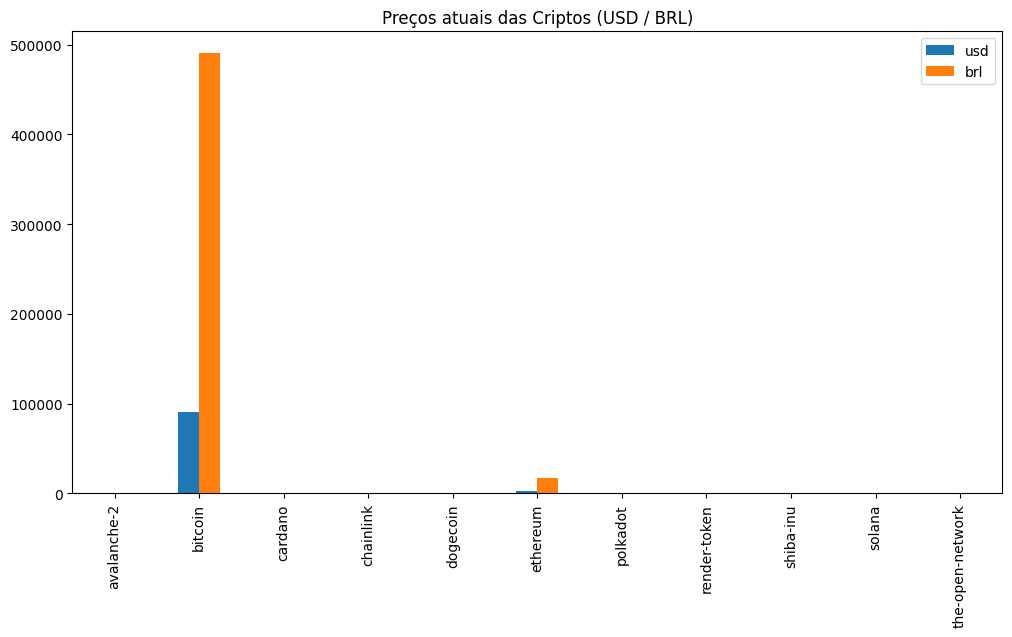

In [ ]:
#comparação visual rápida dos preços atuais de todas as criptomoedas, em USD e BRL.

df.plot(kind='bar', figsize=(12,6))
plt.title("Preços atuais das Criptos (USD / BRL)")
plt.show()


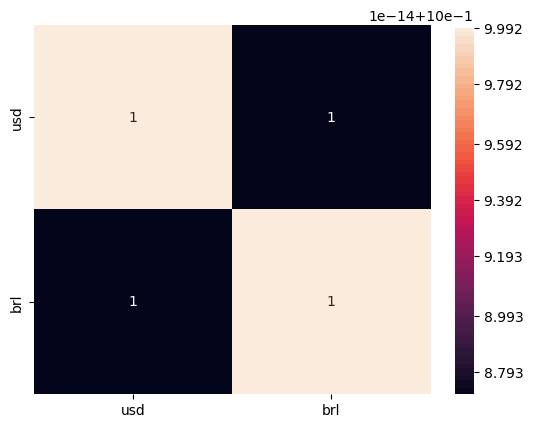

In [ ]:
#Heatmap de correlação entre preços

sns.heatmap(df.corr(), annot=True)
plt.show()


In [ ]:
import datetime

# Definir período histórico
hoje = datetime.datetime.now()
inicio = hoje - datetime.timedelta(days=180)

# Criar DataFrame vazio para armazenar histórico
historico_df = pd.DataFrame()

# Buscar histórico de cada cripto
for coin in coin_ids:
    dados = cg.get_coin_market_chart_range_by_id(
        id=coin,
        vs_currency='usd',
        from_timestamp=int(inicio.timestamp()),
        to_timestamp=int(hoje.timestamp())
    )
    df_coin = pd.DataFrame(dados['prices'], columns=['timestamp', f'{coin}_usd'])
    df_coin['timestamp'] = pd.to_datetime(df_coin['timestamp'], unit='ms')
    df_coin.set_index('timestamp', inplace=True)
    if historico_df.empty:
        historico_df = df_coin
    else:
        historico_df = historico_df.join(df_coin, how='outer')

historico_df.head()


,bitcoin_usd,ethereum_usd,solana_usd,cardano_usd,dogecoin_usd,shiba-inu_usd,avalanche-2_usd,chainlink_usd,polkadot_usd,the-open-network_usd,render-token_usd
timestamp,,,,,,,,,,,
2025-07-17,118748.162737,3368.126522,173.828965,0.764151,0.213170,0.000014,22.686863,16.671987,4.156788,3.159467,4.027491
2025-07-18,119445.365204,3481.882815,176.097645,0.825335,0.219049,0.000015,23.834870,17.981746,4.280365,3.201443,4.175747
2025-07-19,117988.946645,3547.317079,177.369799,0.816174,0.236233,0.000015,23.487426,17.819337,4.227374,3.197310,4.044694
2025-07-20,117901.626559,3594.318501,176.910827,0.830433,0.241363,0.000015,24.528334,18.437752,4.408436,3.202671,4.171142
2025-07-21,117256.920822,3758.605582,180.992231,0.858335,0.272946,0.000015,25.067540,19.304543,4.487875,3.275396,4.352694


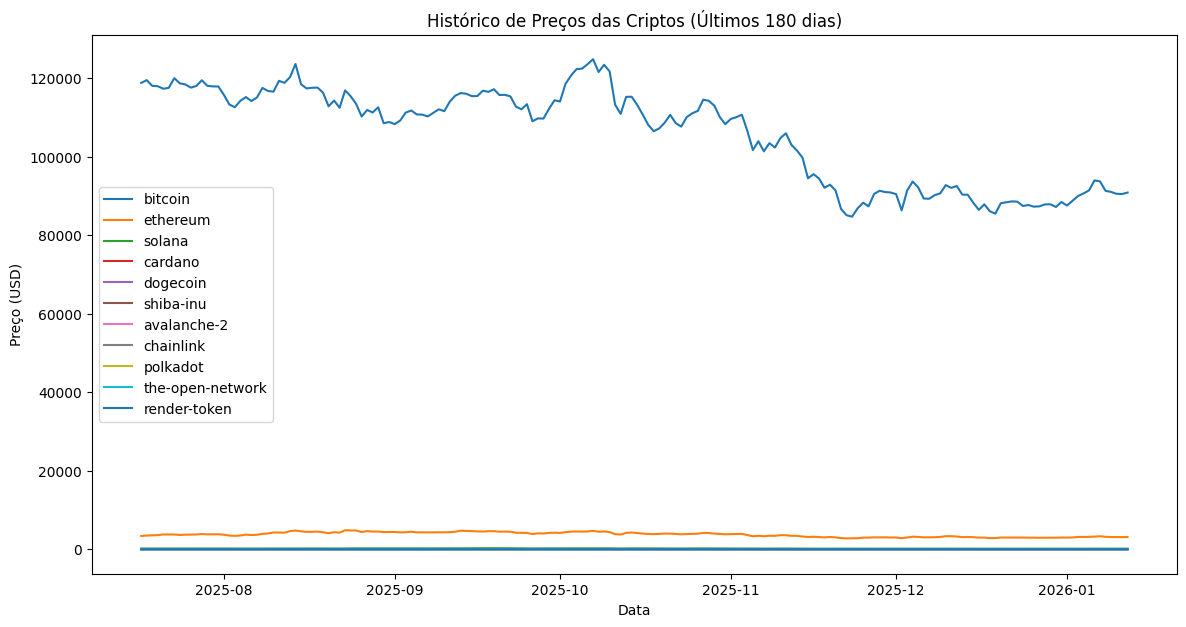

In [ ]:
plt.figure(figsize=(14,7))
for coin in coin_ids:
    plt.plot(historico_df.index, historico_df[f'{coin}_usd'], label=coin)

plt.title("Histórico de Preços das Criptos (Últimos 180 dias)")
plt.xlabel("Data")
plt.ylabel("Preço (USD)")
plt.legend()
plt.show()


In [ ]:
historico_df.describe()


,bitcoin_usd,ethereum_usd,solana_usd,cardano_usd,dogecoin_usd,shiba-inu_usd,avalanche-2_usd,chainlink_usd,polkadot_usd,the-open-network_usd,render-token_usd
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,105706.780458,3735.938333,174.896464,0.653996,0.195074,0.000011,20.739716,17.976900,3.216253,2.462448,2.816513
std,12082.509835,597.373232,35.630909,0.198147,0.045763,0.000002,6.292776,4.333762,0.882988,0.716286,0.984460
min,84682.624291,2764.735219,119.471028,0.332668,0.117287,0.000007,11.434805,11.933710,1.682740,1.436801,1.209599
25%,91358.641978,3118.827099,138.112857,0.432931,0.150080,0.000009,14.251934,13.718314,2.295364,1.742572,1.896199
50%,110408.880159,3787.451109,180.689307,0.675033,0.199253,0.000010,21.204642,17.594915,3.249483,2.292932,2.632341
75%,115541.327590,4303.409772,202.035406,0.830954,0.232536,0.000013,24.773032,22.121165,3.997629,3.169978,3.698056
max,124773.508231,4829.225542,247.556262,0.963210,0.289384,0.000016,35.281079,26.746351,4.541929,3.574652,4.588173


In [ ]:
volatilidade = historico_df.pct_change().std() * np.sqrt(365)
volatilidade.sort_values(ascending=False)


,0
render-token_usd,1.115226
polkadot_usd,0.893928
dogecoin_usd,0.886643
chainlink_usd,0.882051
avalanche-2_usd,0.874243
cardano_usd,0.820900
solana_usd,0.758951
shiba-inu_usd,0.714959
the-open-network_usd,0.686889
ethereum_usd,0.670187


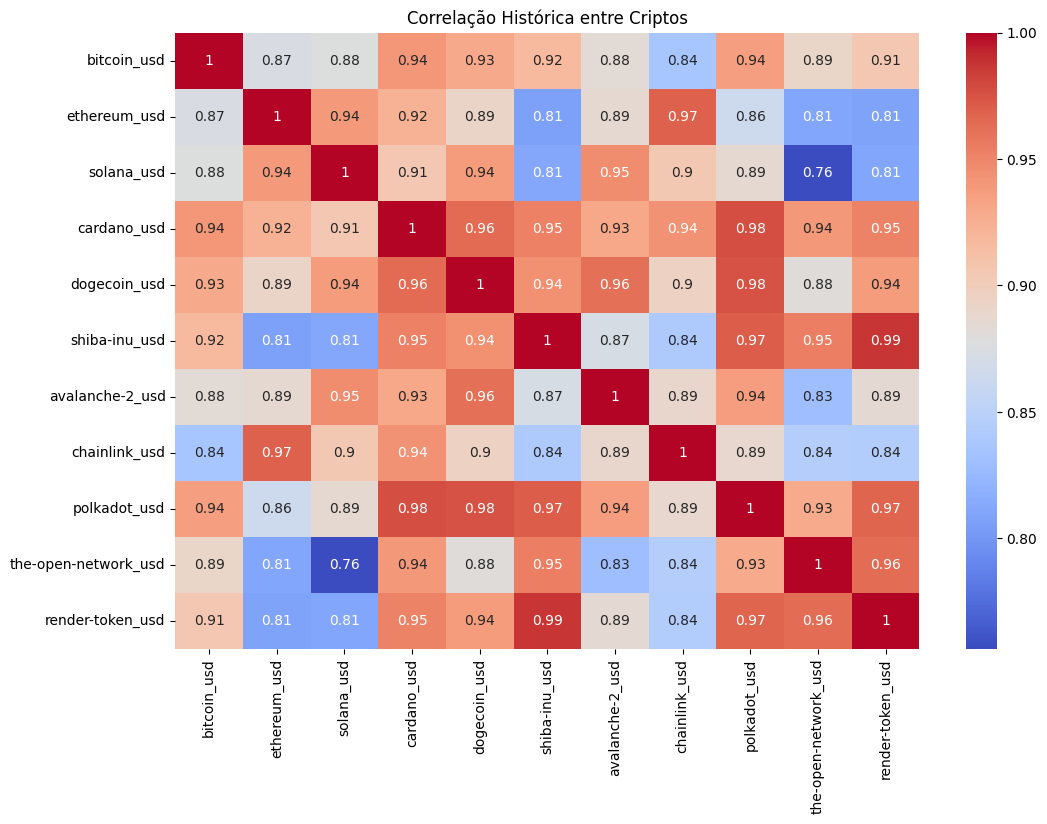

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(historico_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlação Histórica entre Criptos")
plt.show()


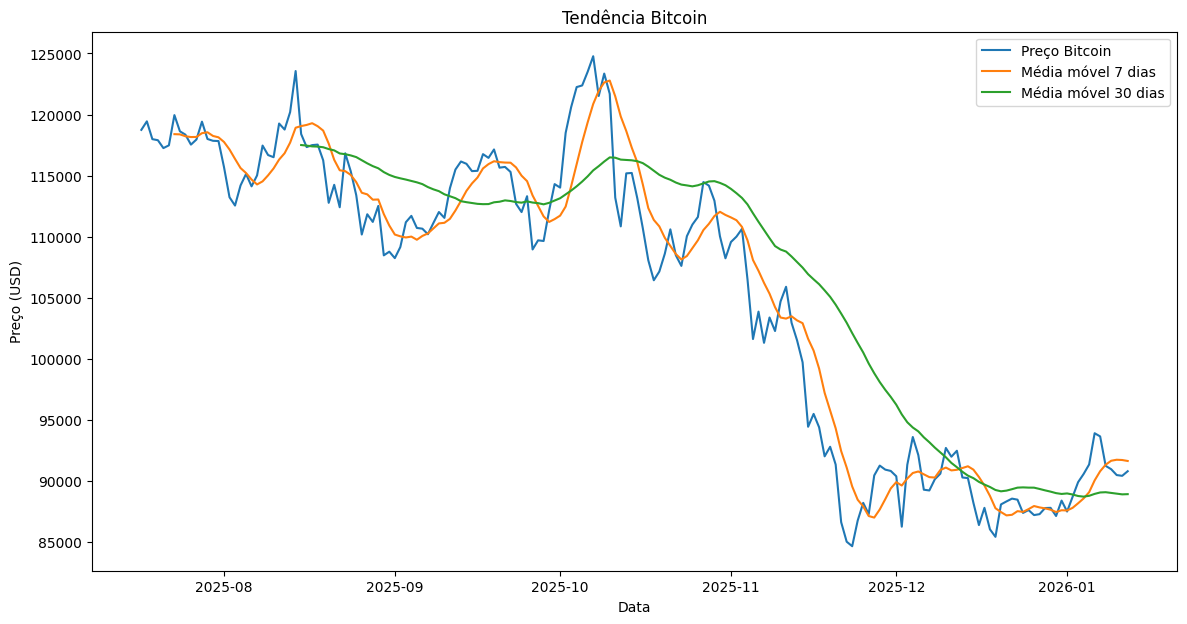

In [ ]:
# Exemplo para Bitcoin
historico_df['bitcoin_ma7'] = historico_df['bitcoin_usd'].rolling(7).mean()
historico_df['bitcoin_ma30'] = historico_df['bitcoin_usd'].rolling(30).mean()

plt.figure(figsize=(14,7))
plt.plot(historico_df.index, historico_df['bitcoin_usd'], label='Preço Bitcoin')
plt.plot(historico_df.index, historico_df['bitcoin_ma7'], label='Média móvel 7 dias')
plt.plot(historico_df.index, historico_df['bitcoin_ma30'], label='Média móvel 30 dias')
plt.title("Tendência Bitcoin")
plt.xlabel("Data")
plt.ylabel("Preço (USD)")
plt.legend()
plt.show()


=== Estatísticas Descritivas ===


,bitcoin_usd,ethereum_usd,solana_usd,cardano_usd,dogecoin_usd,shiba-inu_usd,avalanche-2_usd,chainlink_usd,polkadot_usd,the-open-network_usd,render-token_usd,bitcoin_ma7,bitcoin_ma30
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,174.000000,151.000000
mean,105706.780458,3735.938333,174.896464,0.653996,0.195074,0.000011,20.739716,17.976900,3.216253,2.462448,2.816513,105742.933498,106097.540215
std,12082.509835,597.373232,35.630909,0.198147,0.045763,0.000002,6.292776,4.333762,0.882988,0.716286,0.984460,11822.019858,10762.731886
min,84682.624291,2764.735219,119.471028,0.332668,0.117287,0.000007,11.434805,11.933710,1.682740,1.436801,1.209599,87026.023179,88739.203539
25%,91358.641978,3118.827099,138.112857,0.432931,0.150080,0.000009,14.251934,13.718314,2.295364,1.742572,1.896199,91088.667934,93835.819307
50%,110408.880159,3787.451109,180.689307,0.675033,0.199253,0.000010,21.204642,17.594915,3.249483,2.292932,2.632341,110829.447535,112765.753043
75%,115541.327590,4303.409772,202.035406,0.830954,0.232536,0.000013,24.773032,22.121165,3.997629,3.169978,3.698056,115554.072637,114538.094867
max,124773.508231,4829.225542,247.556262,0.963210,0.289384,0.000016,35.281079,26.746351,4.541929,3.574652,4.588173,122782.867695,117507.380826



=== Volatilidade Anualizada (%) ===


,0
render-token_usd,111.522572
polkadot_usd,89.392764
dogecoin_usd,88.664272
chainlink_usd,88.205122
avalanche-2_usd,87.424283
cardano_usd,82.090007
solana_usd,75.895139
shiba-inu_usd,71.495910
the-open-network_usd,68.688908
ethereum_usd,67.018734


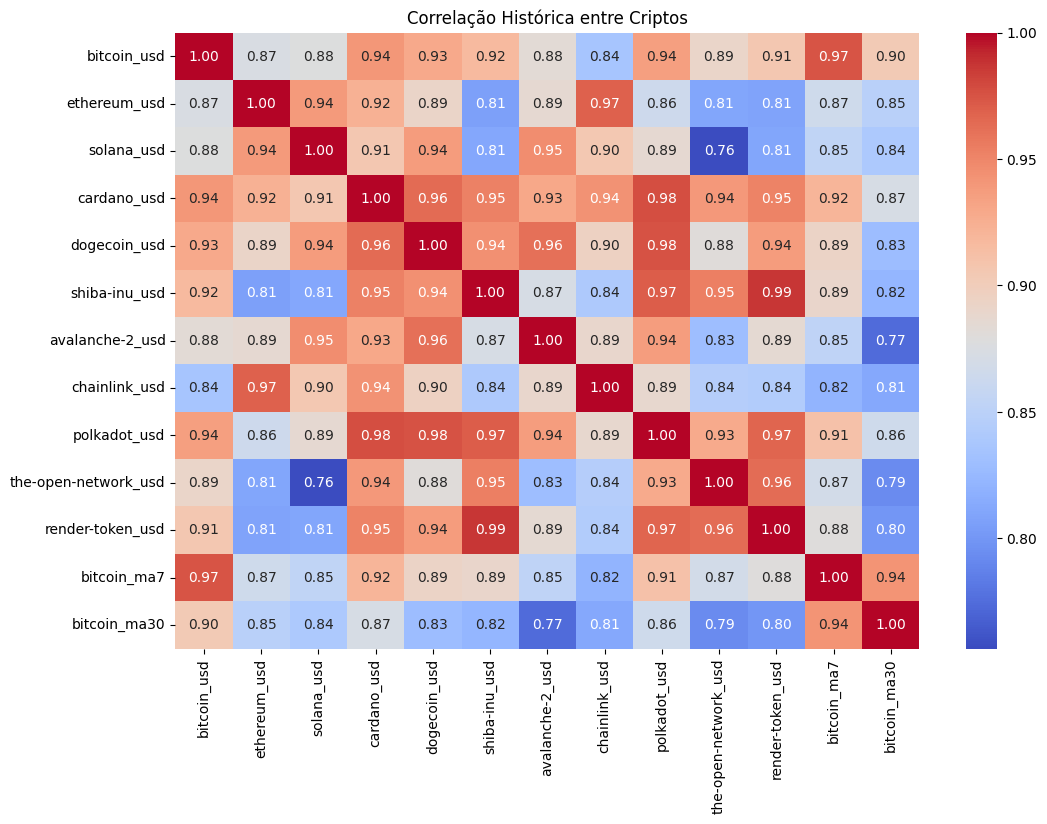

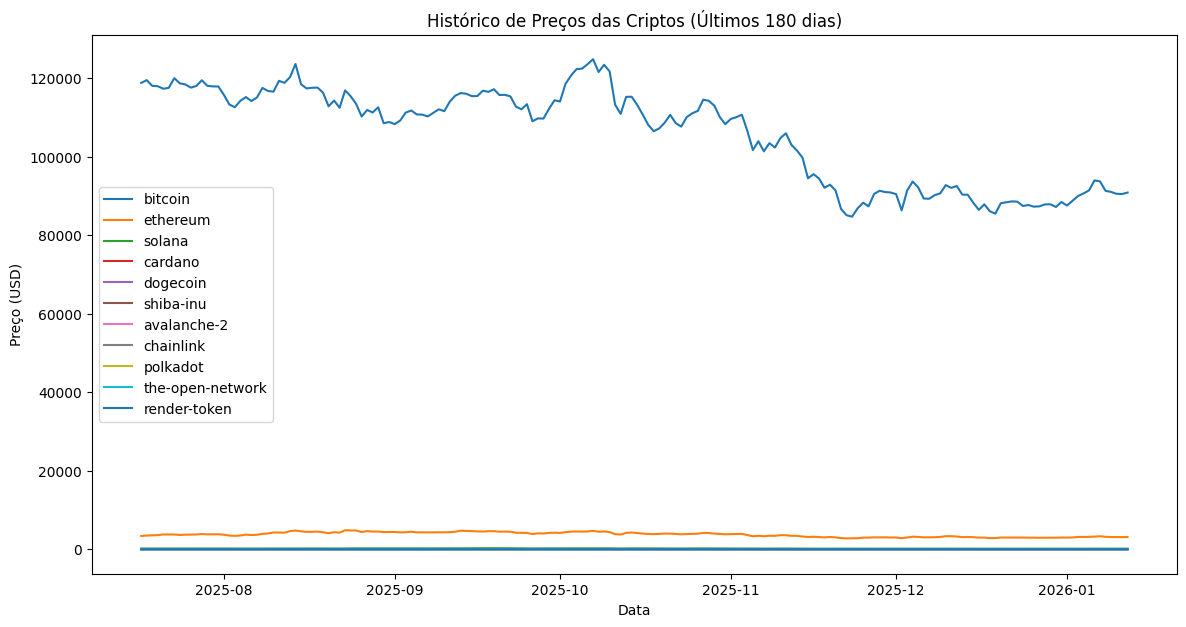

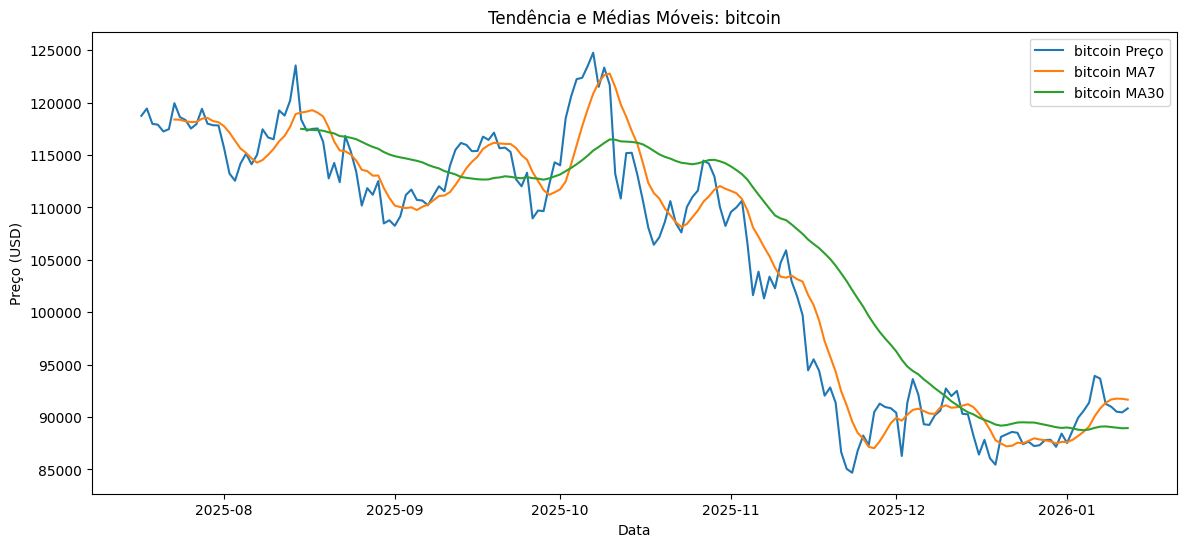

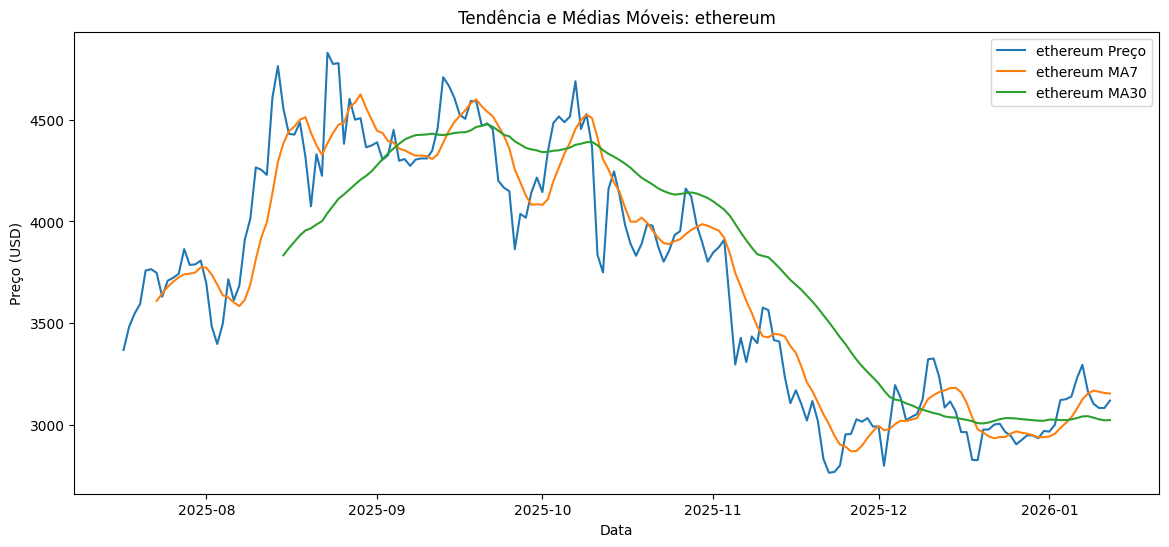

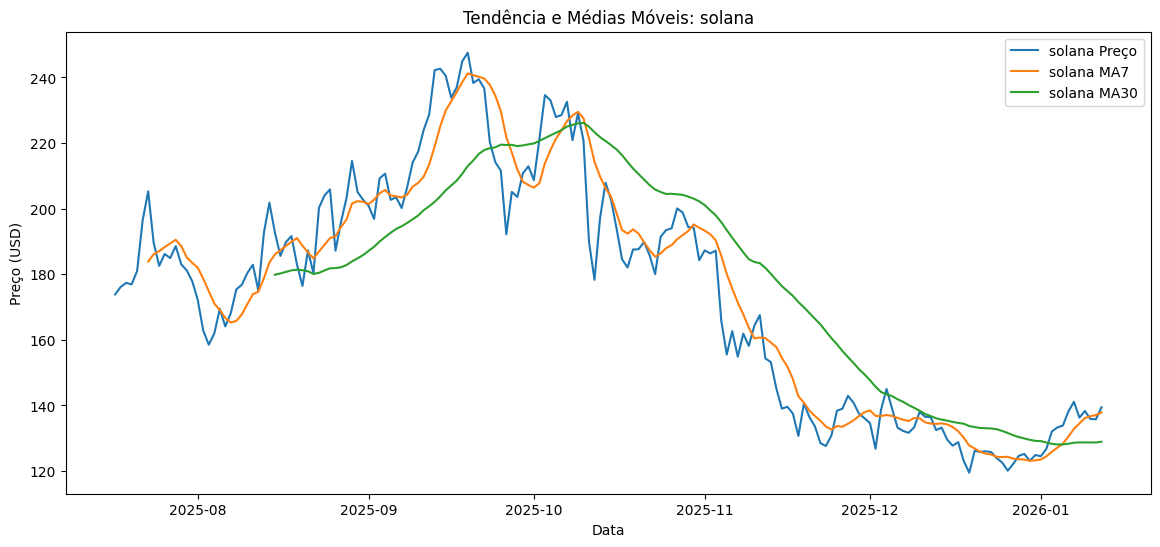

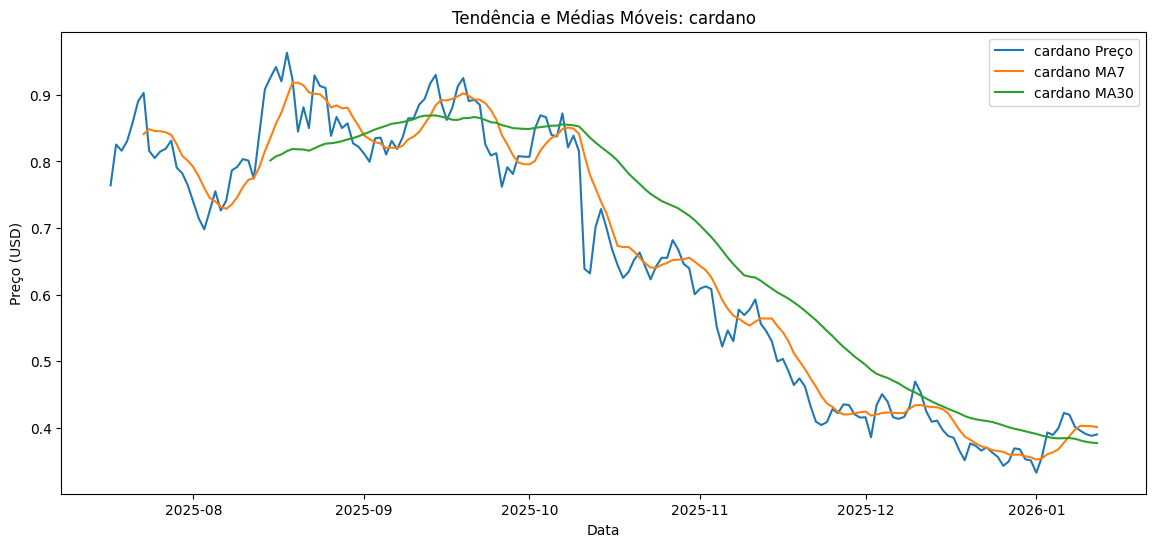

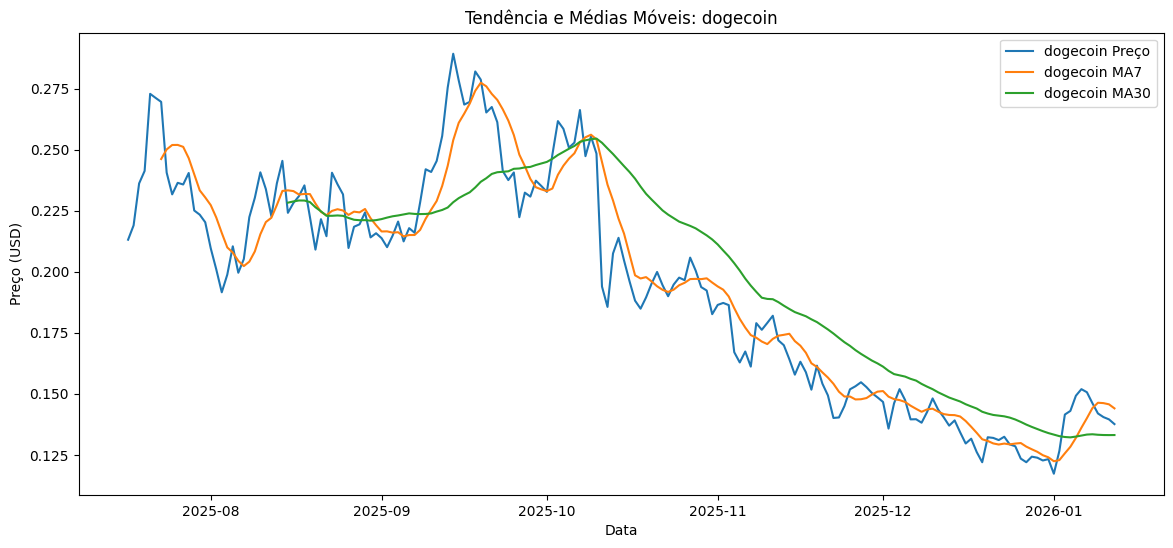

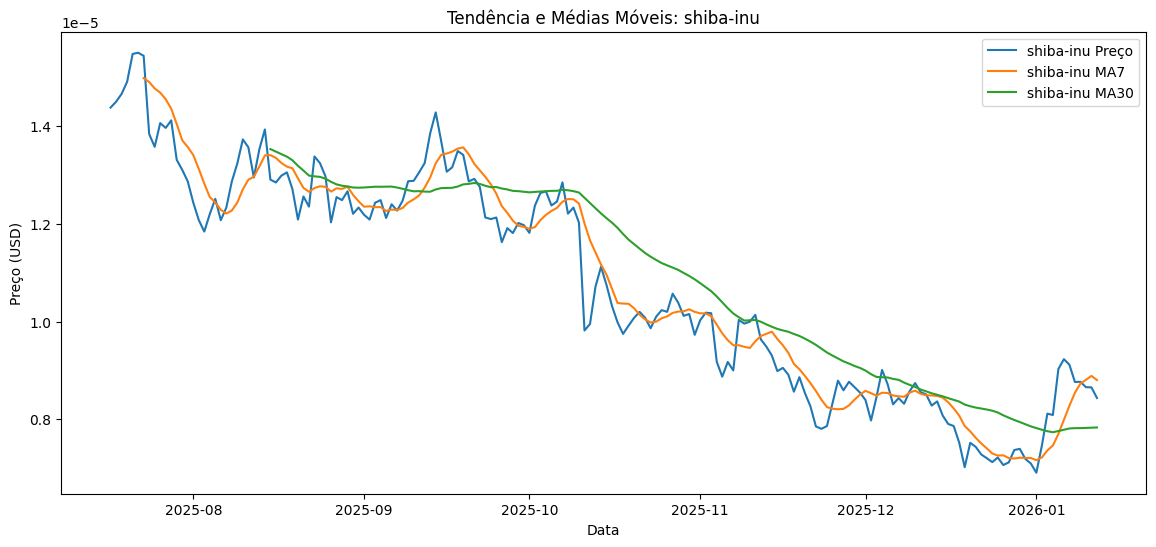

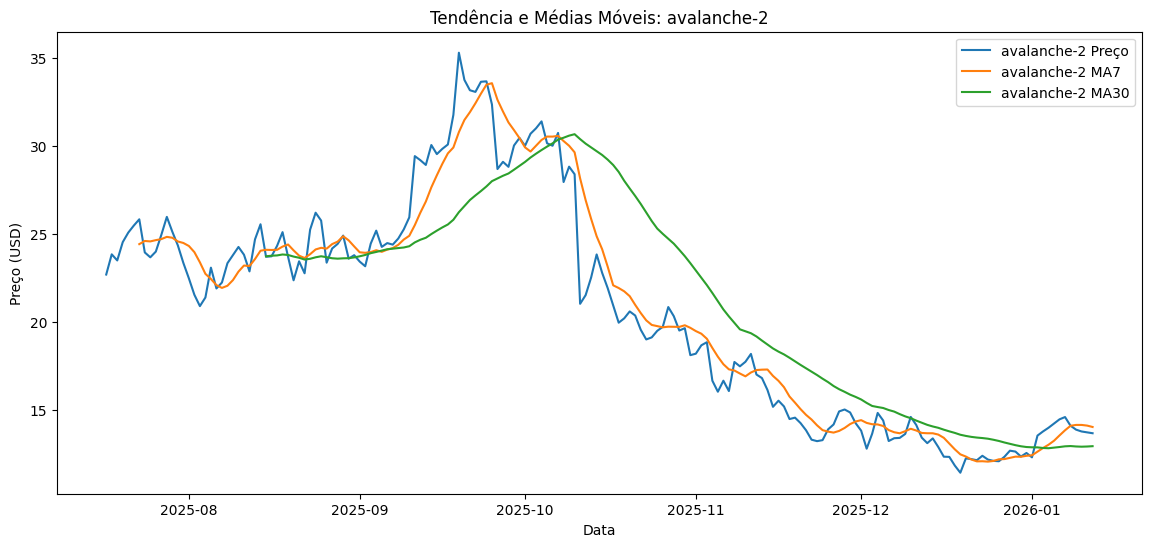

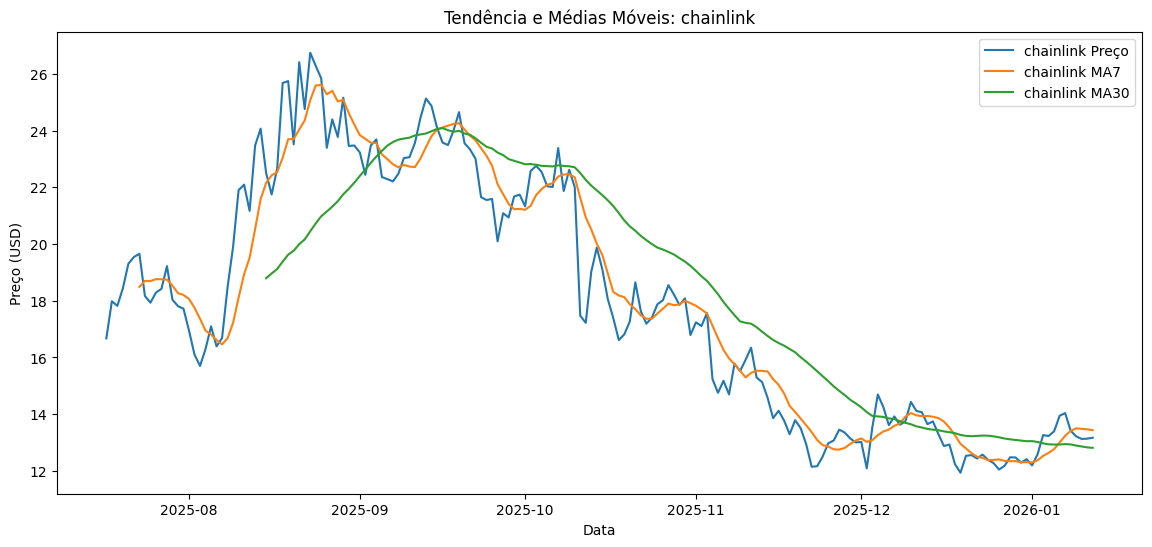

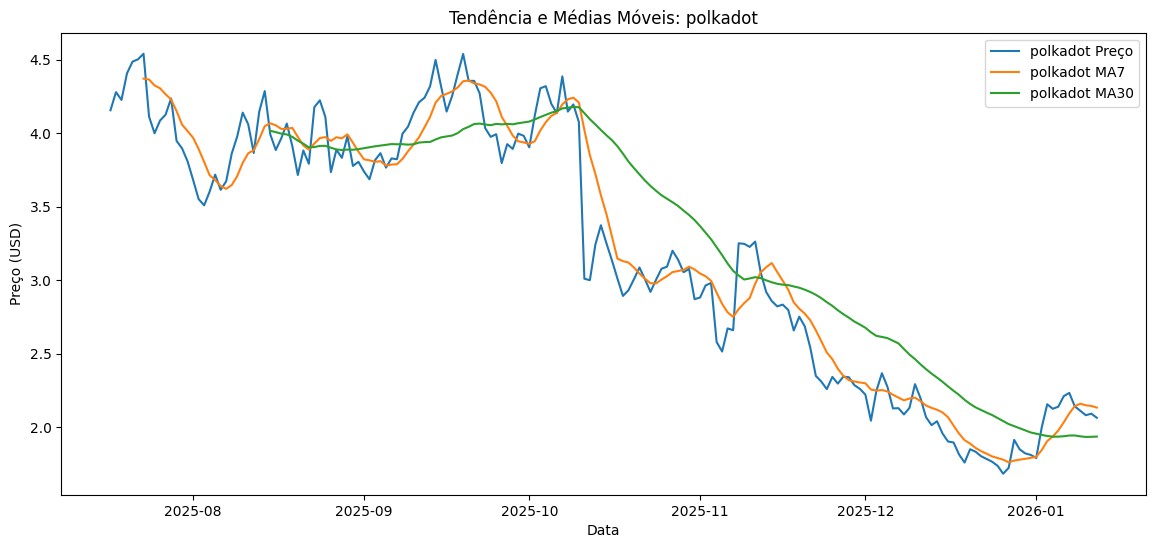

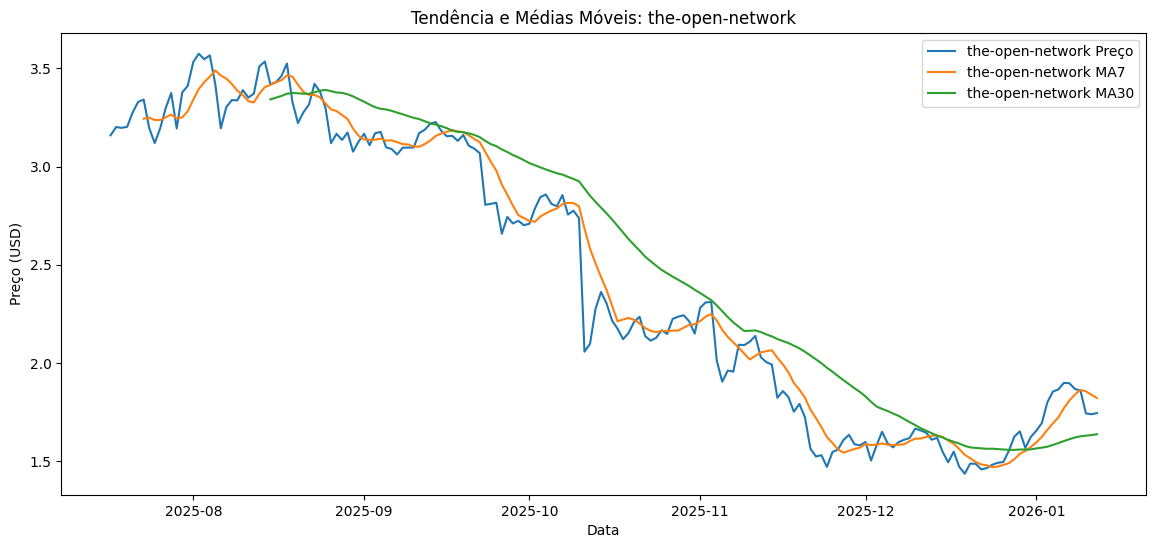

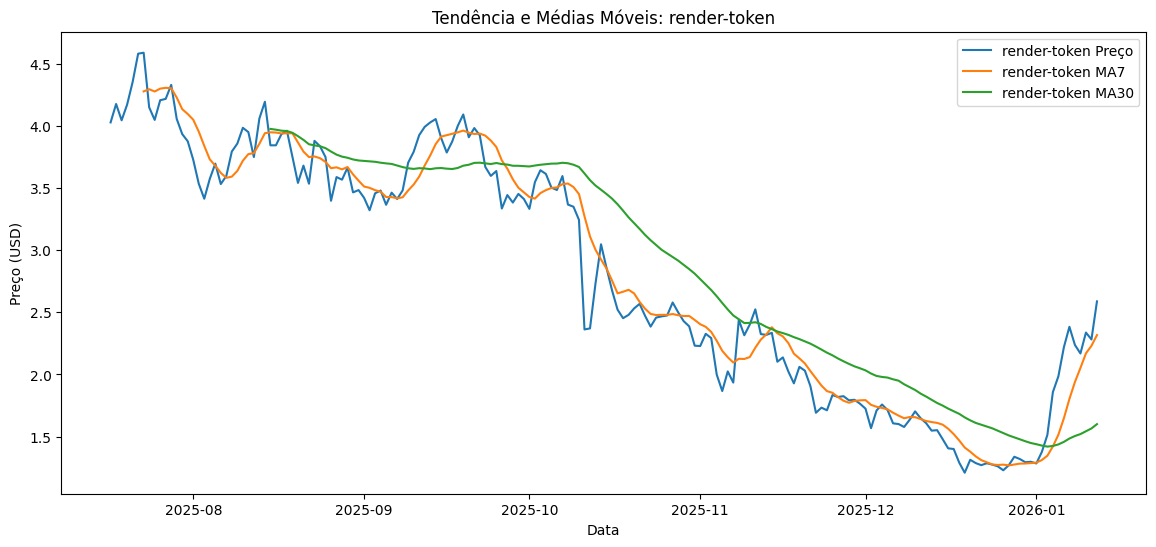

=== Retornos Diários (%) ===


,bitcoin_usd,ethereum_usd,solana_usd,cardano_usd,dogecoin_usd,shiba-inu_usd,avalanche-2_usd,chainlink_usd,polkadot_usd,the-open-network_usd,render-token_usd
timestamp,,,,,,,,,,,
2026-01-08,-0.025726,-0.039546,-0.034228,-0.043243,-0.029857,-0.038704,-0.033843,-0.044221,-0.041080,-0.015380,-0.061224
2026-01-09,-0.002999,-0.019140,0.014837,-0.014678,-0.028716,0.000304,-0.015630,-0.014995,-0.014037,-0.004147,-0.030660
2026-01-10,-0.005261,-0.006792,-0.017731,-0.012582,-0.010495,-0.012522,-0.007538,-0.006727,-0.014307,-0.062804,0.077485
2026-01-11,-0.000695,-0.000055,-0.000300,-0.006758,-0.006601,-0.000499,-0.003694,0.000706,0.005113,-0.002303,-0.023689
2026-01-12,0.004172,0.011806,0.026700,0.005508,-0.013928,-0.025009,-0.003565,0.002655,-0.013402,0.003396,0.134242


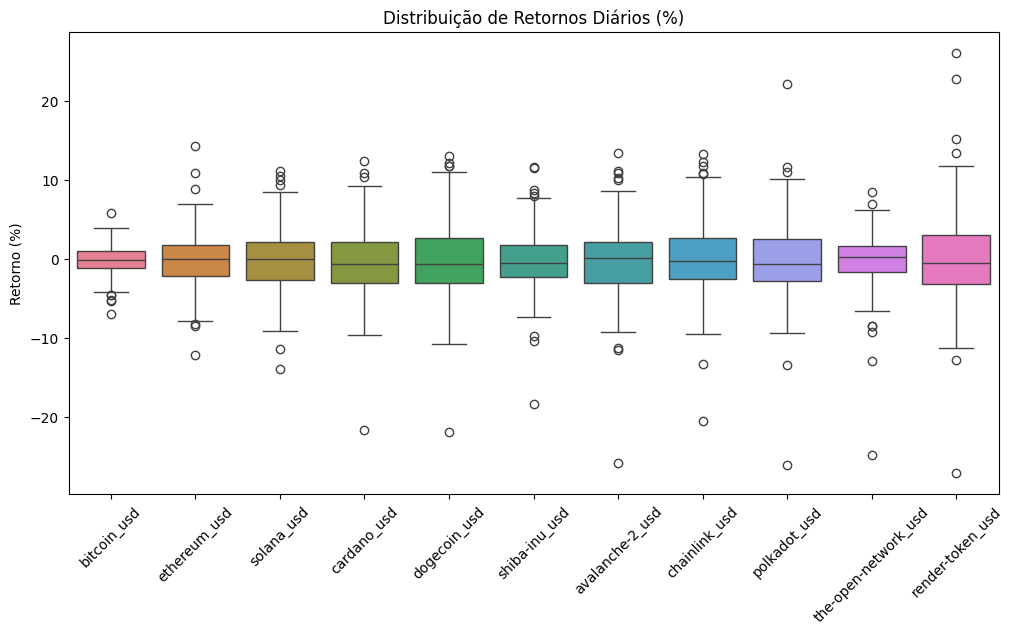

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================
#  Estatísticas descritivas
# ===============================
print("=== Estatísticas Descritivas ===")
display(historico_df.describe())

# ===============================
# Volatilidade anualizada
# ===============================
volatilidade = historico_df.pct_change().std() * np.sqrt(365)
print("\n=== Volatilidade Anualizada (%) ===")
display(volatilidade.sort_values(ascending=False)*100)

# ===============================
# Correlação entre criptos
# ===============================
plt.figure(figsize=(12,8))
sns.heatmap(historico_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlação Histórica entre Criptos")
plt.show()

# ===============================
# Gráficos de tendência históricos
# ===============================
plt.figure(figsize=(14,7))
for coin in coin_ids:
    plt.plot(historico_df.index, historico_df[f'{coin}_usd'], label=coin)
plt.title("Histórico de Preços das Criptos (Últimos 180 dias)")
plt.xlabel("Data")
plt.ylabel("Preço (USD)")
plt.legend()
plt.show()

# ===============================
# Médias móveis (MA7 e MA30) para todas as criptos
# ===============================
ma_days = [7, 30]

for coin in coin_ids:
    for ma in ma_days:
        historico_df[f'{coin}_ma{ma}'] = historico_df[f'{coin}_usd'].rolling(ma).mean()

    plt.figure(figsize=(14,6))
    plt.plot(historico_df.index, historico_df[f'{coin}_usd'], label=f'{coin} Preço')
    plt.plot(historico_df.index, historico_df[f'{coin}_ma7'], label=f'{coin} MA7')
    plt.plot(historico_df.index, historico_df[f'{coin}_ma30'], label=f'{coin} MA30')
    plt.title(f"Tendência e Médias Móveis: {coin}")
    plt.xlabel("Data")
    plt.ylabel("Preço (USD)")
    plt.legend()
    plt.show()

# ===============================
# Retornos diários
# ===============================
retornos_diarios = historico_df[[f'{coin}_usd' for coin in coin_ids]].pct_change()
print("=== Retornos Diários (%) ===")
display(retornos_diarios.tail())

# ===============================
# Visualização de Retornos (boxplot)
# ===============================
plt.figure(figsize=(12,6))
sns.boxplot(data=retornos_diarios*100)
plt.title("Distribuição de Retornos Diários (%)")
plt.ylabel("Retorno (%)")
plt.xticks(rotation=45)
plt.show()


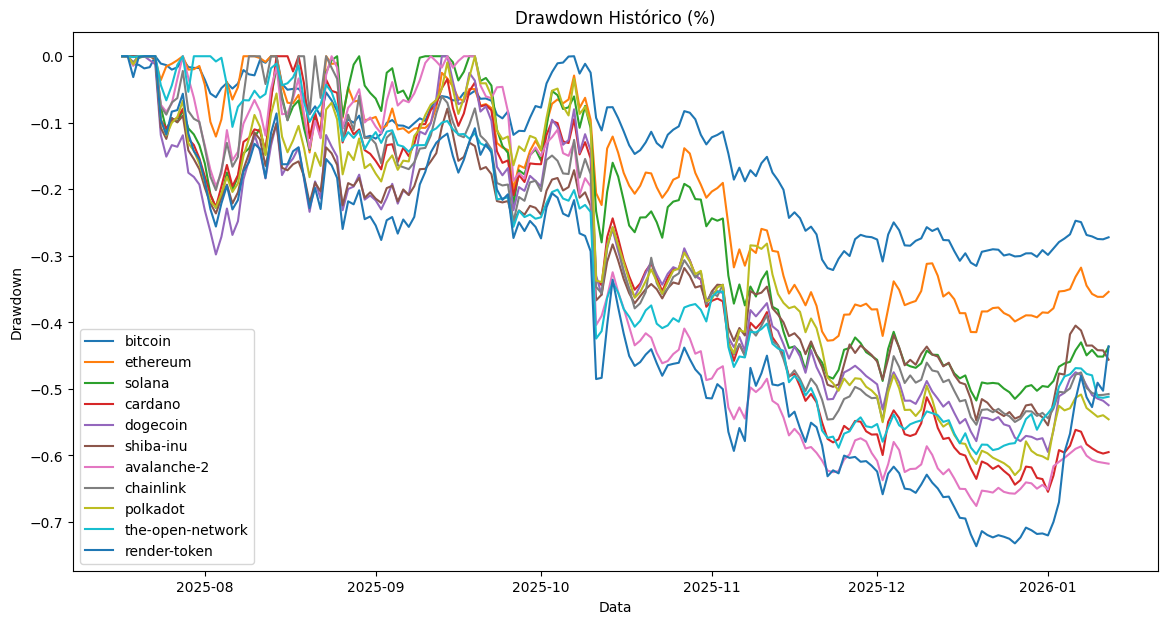

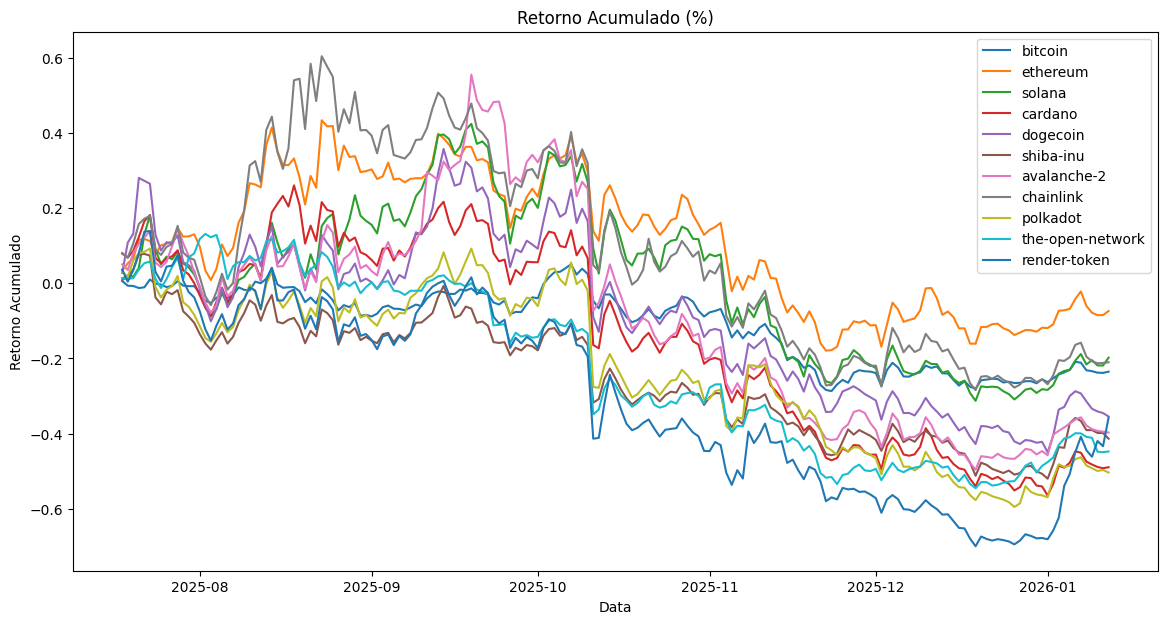

In [ ]:
# Retorno acumulado diário para cada cripto
retornos_acumulados = (1 + retornos_diarios).cumprod() - 1

# Drawdown máximo
drawdown = historico_df[[f'{coin}_usd' for coin in coin_ids]].div(historico_df[[f'{coin}_usd' for coin in coin_ids]].cummax()) - 1

# Visualização: Drawdown histórico
plt.figure(figsize=(14,7))
for coin in coin_ids:
    plt.plot(drawdown.index, drawdown[f'{coin}_usd'], label=coin)
plt.title("Drawdown Histórico (%)")
plt.xlabel("Data")
plt.ylabel("Drawdown")
plt.legend()
plt.show()

# Visualização: Retorno acumulado
plt.figure(figsize=(14,7))
for coin in coin_ids:
    plt.plot(retornos_acumulados.index, retornos_acumulados[f'{coin}_usd'], label=coin)
plt.title("Retorno Acumulado (%)")
plt.xlabel("Data")
plt.ylabel("Retorno Acumulado")
plt.legend()
plt.show()


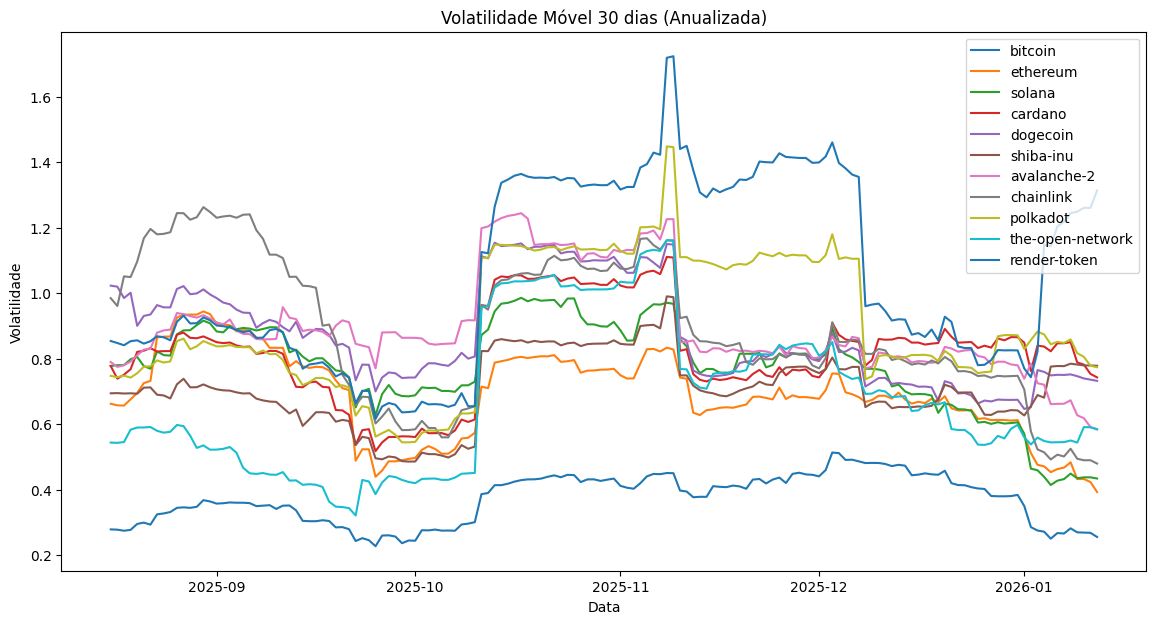

In [ ]:
# Volatilidade móvel (30 dias)
vol_movel = retornos_diarios.rolling(30).std() * np.sqrt(365)

plt.figure(figsize=(14,7))
for coin in coin_ids:
    plt.plot(vol_movel.index, vol_movel[f'{coin}_usd'], label=coin)
plt.title("Volatilidade Móvel 30 dias (Anualizada)")
plt.xlabel("Data")
plt.ylabel("Volatilidade")
plt.legend()
plt.show()


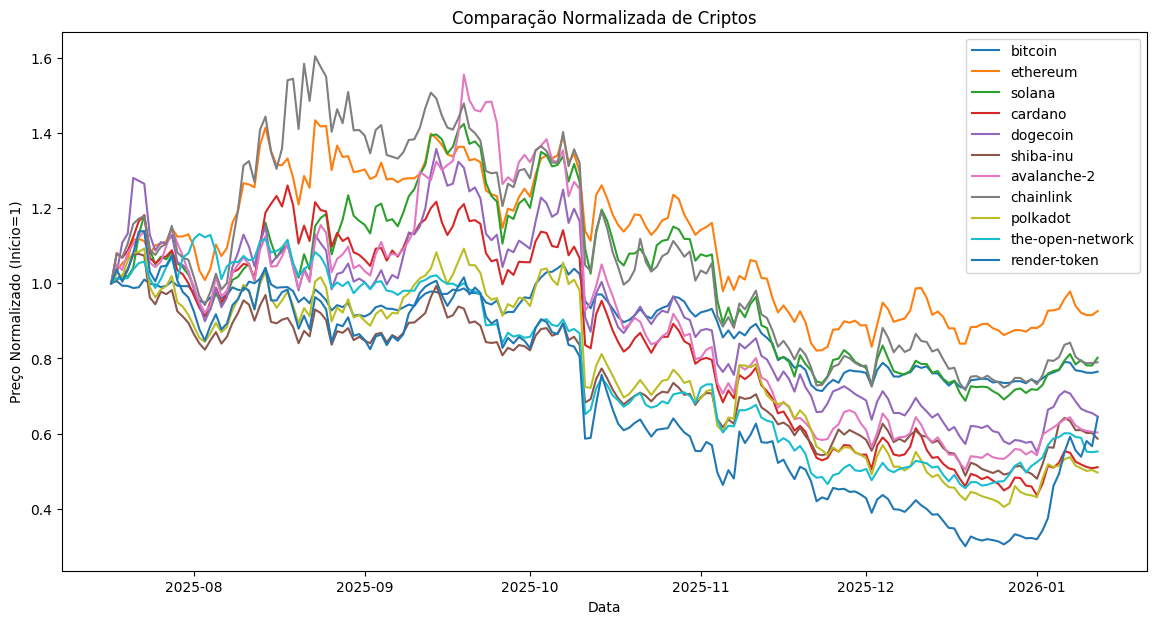

In [ ]:
# Normalizar preços para comparação (início = 1)
historico_norm = historico_df[[f'{coin}_usd' for coin in coin_ids]] / historico_df[[f'{coin}_usd' for coin in coin_ids]].iloc[0]

plt.figure(figsize=(14,7))
for coin in coin_ids:
    plt.plot(historico_norm.index, historico_norm[f'{coin}_usd'], label=coin)
plt.title("Comparação Normalizada de Criptos")
plt.xlabel("Data")
plt.ylabel("Preço Normalizado (Início=1)")
plt.legend()
plt.show()


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
for coin in coin_ids:
    fig.add_trace(go.Scatter(x=historico_df.index, y=historico_df[f'{coin}_usd'], mode='lines', name=coin))
fig.update_layout(title="Histórico de Preços Interativo",
                  xaxis_title="Data", yaxis_title="Preço (USD)")
fig.show()


In [ ]:
from prophet import Prophet

# Exemplo: Bitcoin
btc_df = historico_df[['bitcoin_usd']].reset_index().rename(columns={'timestamp':'ds','bitcoin_usd':'y'})
model = Prophet(daily_seasonality=True)
model.fit(btc_df)

# Previsão 30 dias à frente
future = model.make_future_dataframe(periods=3)
forecast = model.predict(future)

# Visualização interativa com Plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=btc_df['ds'], y=btc_df['y'], mode='lines', name='Histórico'))
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Previsão'))
fig.update_layout(title="Previsão Preço Bitcoin (30 dias)",
                  xaxis_title="Data", yaxis_title="Preço (USD)")
fig.show()


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
!pip install fpdf2 --quiet


In [ ]:
from fpdf import FPDF
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import numpy as np

def gerar_relatorio_criptos_completo(historico_df, retornos_acumulados, volatilidade, drawdown, coin_ids, arquivo_pdf="analise_criptos_completo.pdf"):
    pdf = FPDF()
    pdf.set_auto_page_break(auto=True, margin=15)
    pdf.add_page()

    os.makedirs("temp_graphs", exist_ok=True)

    # ========================
    # Título
    # ========================
    pdf.set_font("Arial", "B", 16)
    pdf.cell(0, 10, "Relatório de Criptomoedas - Análise Completa", ln=True, align="C")
    pdf.ln(10)

    # ========================
    # 1 - Estatísticas resumidas
    # ========================
    pdf.set_font("Arial", "B", 12)
    pdf.cell(0, 8, "1 - Estatísticas Resumidas", ln=True)
    pdf.set_font("Arial", "", 10)
    pdf.multi_cell(0, 5, historico_df.describe().round(2).tail(5).to_string())
    pdf.ln(2)
    pdf.multi_cell(0, 5, "Nota: Preço médio indica tendência central; mínimo mostra queda; máximo mostra pico. Permite entender amplitude de movimentação.")
    pdf.ln(5)

    # ========================
    # 2 - Volatilidade anualizada
    # ========================
    pdf.set_font("Arial", "B", 12)
    pdf.cell(0, 8, "2 - Volatilidade Anualizada (%)", ln=True)
    pdf.set_font("Arial", "", 10)
    pdf.multi_cell(0, 5, (volatilidade*100).sort_values(ascending=False).round(2).to_string())
    pdf.ln(2)
    pdf.multi_cell(0, 5, "Nota: Volatilidade mostra risco histórico; valores altos indicam maior oscilação e risco para investimento.")
    pdf.ln(5)

    # ========================
    # 3 - Drawdown máximo
    # ========================
    pdf.set_font("Arial", "B", 12)
    pdf.cell(0, 8, "3 - Drawdown Máximo (%)", ln=True)
    pdf.set_font("Arial", "", 10)
    pdf.multi_cell(0, 5, drawdown.min().round(4).to_frame().to_string())
    pdf.ln(2)
    pdf.multi_cell(0, 5, "Nota: Drawdown máximo indica maior queda em relação ao pico histórico, ajudando a visualizar risco de perda.")
    pdf.ln(5)

    # ========================
    # 4 - Últimos 5 retornos acumulados
    # ========================
    pdf.set_font("Arial", "B", 12)
    pdf.cell(0, 8, "4 - Últimos 5 Retornos Acumulados (%)", ln=True)
    pdf.set_font("Arial", "", 10)
    pdf.multi_cell(0, 5, retornos_acumulados.tail(5).round(4).to_string())
    pdf.ln(2)
    pdf.multi_cell(0, 5, "Nota: Retorno acumulado indica tendência recente; positivo = alta, negativo = baixa.")
    pdf.ln(5)

    # ========================
    # 5 - Comparação Normalizada de Preços
    # ========================
    pdf.set_font("Arial", "B", 12)
    pdf.cell(0, 8, "5 - Comparação Normalizada de Preços (início=1)", ln=True)
    historico_norm = historico_df[[f"{coin}_usd" for coin in coin_ids]] / historico_df[[f"{coin}_usd" for coin in coin_ids]].iloc[0]
    plt.figure(figsize=(12,6))
    for coin in coin_ids:
        plt.plot(historico_norm.index, historico_norm[f"{coin}_usd"], label=coin)
    plt.title("Comparação Normalizada de Criptos")
    plt.xlabel("Data")
    plt.ylabel("Preço Normalizado")
    plt.legend()
    arquivo_grafico = "temp_graphs/comparacao_normalizada.png"
    plt.savefig(arquivo_grafico, bbox_inches='tight')
    plt.close()
    pdf.image(arquivo_grafico, w=180)
    pdf.ln(2)
    pdf.multi_cell(0, 5, "Nota: Mostra evolução relativa dos preços iniciando em 1. Permite comparar performance histórica de forma visual.")
    pdf.ln(5)

    # ========================
    # 6 - Ranking Top/Bottom 5
    # ========================
    pdf.set_font("Arial", "B", 12)
    pdf.cell(0, 8, "6 - Ranking de Crescimento", ln=True)
    crescimento_total = historico_df.iloc[-1][[f"{coin}_usd" for coin in coin_ids]] / historico_df.iloc[0][[f"{coin}_usd" for coin in coin_ids]] - 1
    top5 = crescimento_total.sort_values(ascending=False).head(5)
    bottom5 = crescimento_total.sort_values().head(5)
    pdf.set_font("Arial", "", 10)
    pdf.multi_cell(0, 5, f"Top 5 Moedas:\n{top5.round(4).to_string()}\n\nBottom 5 Moedas:\n{bottom5.round(4).to_string()}")
    pdf.ln(2)
    pdf.multi_cell(0, 5, "Nota: Mostra moedas com maior e menor crescimento relativo no período.")
    pdf.ln(5)

    # ========================
    # 7 - Correlação entre criptos (Heatmap)
    # ========================
    pdf.set_font("Arial", "B", 12)
    pdf.cell(0, 8, "7 - Correlação entre Criptos", ln=True)
    corr = historico_df[[f"{coin}_usd" for coin in coin_ids]].pct_change().corr()
    plt.figure(figsize=(10,8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Correlação de Retornos Diários")
    arquivo_corr = "temp_graphs/correlacao.png"
    plt.savefig(arquivo_corr, bbox_inches='tight')
    plt.close()
    pdf.image(arquivo_corr, w=180)
    pdf.ln(2)
    pdf.multi_cell(0,5,"Nota: Correlação indica como as moedas se movem juntas; útil para diversificação de portfólio.")
    pdf.ln(5)

    # ========================
    # 8 - Scatter Risco x Retorno
    # ========================
    pdf.set_font("Arial", "B", 12)
    pdf.cell(0, 8, "8 - Retorno x Volatilidade", ln=True)
    risco_retorno = pd.DataFrame({
        "Retorno": crescimento_total,
        "Volatilidade": volatilidade
    })
    plt.figure(figsize=(10,6))
    plt.scatter(risco_retorno["Volatilidade"], risco_retorno["Retorno"])
    for i, txt in enumerate(risco_retorno.index):
        plt.annotate(txt, (risco_retorno["Volatilidade"][i], risco_retorno["Retorno"][i]))
    plt.xlabel("Volatilidade")
    plt.ylabel("Crescimento Total")
    plt.title("Risco x Retorno")
    arquivo_scatter = "temp_graphs/risco_retorno.png"
    plt.savefig(arquivo_scatter, bbox_inches='tight')
    plt.close()
    pdf.image(arquivo_scatter, w=180)
    pdf.ln(2)
    pdf.multi_cell(0,5,"Nota: Mostra relação risco x retorno; ajuda a entender quais moedas cresceram mais assumindo menor risco.")
    pdf.ln(5)

    # ========================
    # 9 - Drawdown Detalhado (Gráfico)
    # ========================
    pdf.set_font("Arial", "B", 12)
    pdf.cell(0, 8, "9 - Drawdown Detalhado", ln=True)
    plt.figure(figsize=(12,6))
    for coin in coin_ids:
        picos = historico_df[f"{coin}_usd"].cummax()
        drawdown_detalhado = (historico_df[f"{coin}_usd"] - picos) / picos
        plt.plot(historico_df.index, drawdown_detalhado, label=coin)
    plt.title("Drawdown Detalhado")
    plt.xlabel("Data")
    plt.ylabel("Drawdown")
    plt.legend()
    arquivo_dd = "temp_graphs/drawdown_detalhado.png"
    plt.savefig(arquivo_dd, bbox_inches='tight')
    plt.close()
    pdf.image(arquivo_dd, w=180)
    pdf.ln(2)
    pdf.multi_cell(0,5,"Nota: Visualiza quedas desde os picos históricos, mostrando risco máximo ao longo do tempo.")
    pdf.ln(5)

    # ========================
    # Salvar PDF
    # ========================
    pdf.output(arquivo_pdf)
    print(f"✅ PDF completo gerado: {arquivo_pdf}")

# ============================
# Execução
# ============================
gerar_relatorio_criptos_completo(
    historico_df, retornos_acumulados, volatilidade, drawdown, coin_ids
)


/tmp/ipython-input-3921665112.py:130: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



✅ PDF completo gerado: analise_criptos_completo.pdf
